PREDICTIVE-INSIGHTS-FOR-LESS-ACCIDENTS
Ariel Koren - 318284239
Assaf Benkormono - 318455904
Github - https://github.com/arielk318/PREDICTIVE-INSIGHTS-FOR-LESS-ACCIDENTS

In [76]:
# ניתוח עקרי רכיבים (PCA) וכלי עיבוד נתונים
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# מודלים
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# כלי עזר למודלים
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, silhouette_score, davies_bouldin_score, silhouette_samples
)

# כלי עיבוד נתונים נוספים
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.utils import resample

# הדמיה
import seaborn as sns
import matplotlib.pyplot as plt

#HTML
from IPython.display import display, HTML

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [2]:
#pip install xgboost


In [3]:
df = pd.read_csv("accid_muni.csv")
# df

In [4]:
df.describe

<bound method NDFrame.describe of       OID  SUMACCIDEN             CITY  CITYCODE      MUNITYPE DISTRICT  \
0      -1         117          אבו גוש       472  מועצה מקומית  ירושלים   
1      -1         291         אבו סנאן       473  מועצה מקומית     צפון   
2      -1         226        אבן יהודה       182  מועצה מקומית     מרכז   
3      -1        1016       אום אל פחם      2710        עירייה     חיפה   
4      -1         376           אופקים        31        עירייה     דרום   
...   ...         ...              ...       ...           ...      ...   
1169   -1          12          עין גדי      2042  מועצה אזורית     דרום   
1170   -1           1         עין חצבה      1053  מועצה אזורית     דרום   
1171   -1           0          עין תמר      1251  מועצה אזורית     דרום   
1172   -1         312  שטח כללי (סדום)      5551  מועצה אזורית     דרום   
1173   -1        7606    יהודה ושומרון      9999                          

          MUNICIPAL  MUNICODE   DEAD  SEVER_INJ  ...  MOTORCYCLE 

In [5]:
na_per_column = df.isnull().sum(axis=0)
na_per_column

OID              0
SUMACCIDEN       0
CITY             0
CITYCODE         0
MUNITYPE         0
DISTRICT         0
MUNICIPAL        0
MUNICODE         0
DEAD            83
SEVER_INJ       83
SLIGH_INJ       83
PEDESTRINJ      83
INJ0_19         83
INJ20_64        83
INJ65_          83
INJTOTAL        83
TOTDRIVERS      83
MOTORCYCLE      83
TRUCK           83
BICYCLE         83
PRIVATE         83
VEHICLE         83
ACC_INDEX        0
AreaSQKM         0
YEARMONTH        0
Shape_Length     0
Shape_Area       0
dtype: int64

###### We completed the missing values by grouping the data by municipal area and calculating the average value within each area.

In [6]:
# Fill missing values with group mean
filled_df = df.copy()
columns_to_fill = ['DEAD', 'SEVER_INJ', 'SLIGH_INJ', 'PEDESTRINJ',
                   'INJ0_19', 'INJ20_64', 'INJ65_', 'INJTOTAL',
                   'TOTDRIVERS', 'MOTORCYCLE', 'TRUCK', 'BICYCLE',
                   'PRIVATE', 'VEHICLE']
for col in columns_to_fill:
    filled_df[col] = df.groupby('MUNICODE')[col].transform(lambda x: x.fillna(x.mean()))


In [7]:
na_per_column = filled_df.isnull().sum(axis=0)
na_per_column

OID              0
SUMACCIDEN       0
CITY             0
CITYCODE         0
MUNITYPE         0
DISTRICT         0
MUNICIPAL        0
MUNICODE         0
DEAD            33
SEVER_INJ       33
SLIGH_INJ       33
PEDESTRINJ      33
INJ0_19         33
INJ20_64        33
INJ65_          33
INJTOTAL        33
TOTDRIVERS      33
MOTORCYCLE      33
TRUCK           33
BICYCLE         33
PRIVATE         33
VEHICLE         33
ACC_INDEX        0
AreaSQKM         0
YEARMONTH        0
Shape_Length     0
Shape_Area       0
dtype: int64

In [8]:
na_per_column = df.isnull().sum(axis=0)
na_per_column
filled_df[filled_df.isnull().any(axis=1)]

,OID,SUMACCIDEN,CITY,CITYCODE,MUNITYPE,DISTRICT,MUNICIPAL,MUNICODE,DEAD,SEVER_INJ,...,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE,VEHICLE,ACC_INDEX,AreaSQKM,YEARMONTH,Shape_Length,Shape_Area
564,-1,0,ללא שיפוט - אזור בין דבוריה לאכסאל,9932,ללא שיפוט,צפון,ללא שיפוט - אזור בין דבוריה לאכסאל,9932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.657149,202405,3690.532225,6.571490e+05
567,-1,0,ללא שיפוט - אזור גבעת המורה,9934,ללא שיפוט,צפון,ללא שיפוט - אזור גבעת המורה,9934,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.266752,202405,2816.028887,2.667523e+05
568,-1,0,ללא שיפוט - אזור הארבל,9926,ללא שיפוט,צפון,ללא שיפוט - אזור הארבל,9926,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.026971,202405,807.296731,2.697131e+04
569,-1,0,ללא שיפוט - אזור הכנרת,9920,ללא שיפוט,צפון,ללא שיפוט - אזור הכנרת,9920,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,163.642675,202405,56960.850295,1.636427e+08
573,-1,0,ללא שיפוט - אזור הר סאסא,9905,ללא שיפוט,צפון,ללא שיפוט - אזור הר סאסא,9905,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.713858,202405,4029.721245,7.138582e+05
575,-1,0,"ללא שיפוט - אזור השפד""""ן",9965,ללא שיפוט,מרכז,"ללא שיפוט - אזור השפד""""ן",9965,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,2.489612,202405,8058.294449,2.489612e+06
577,-1,0,ללא שיפוט - אזור חלוץ,9910,ללא שיפוט,צפון,ללא שיפוט - אזור חלוץ,9910,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,2.033581,202405,9242.586448,2.033581e+06
578,-1,0,ללא שיפוט - אזור יער אלונה,9940,ללא שיפוט,חיפה,ללא שיפוט - אזור יער אלונה,9940,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.557178,202405,4127.990300,5.571778e+05
579,-1,0,ללא שיפוט - אזור יער חורשים,9961,ללא שיפוט,מרכז,ללא שיפוט - אזור יער חורשים,9961,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.697610,202405,4629.955333,6.976098e+05
583,-1,0,ללא שיפוט - אזור כפר תבור,9931,ללא שיפוט,צפון,ללא שיפוט - אזור כפר תבור,9931,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.379615,202405,3126.624948,3.796149e+05


###### The remaining rows correspond to areas without municipal area classification, so I simply delete them since it's a small number of rows.

In [9]:
filled_df = filled_df.dropna()

In [10]:
na_per_column = filled_df.isnull().sum(axis=0)
na_per_column

OID             0
SUMACCIDEN      0
CITY            0
CITYCODE        0
MUNITYPE        0
DISTRICT        0
MUNICIPAL       0
MUNICODE        0
DEAD            0
SEVER_INJ       0
SLIGH_INJ       0
PEDESTRINJ      0
INJ0_19         0
INJ20_64        0
INJ65_          0
INJTOTAL        0
TOTDRIVERS      0
MOTORCYCLE      0
TRUCK           0
BICYCLE         0
PRIVATE         0
VEHICLE         0
ACC_INDEX       0
AreaSQKM        0
YEARMONTH       0
Shape_Length    0
Shape_Area      0
dtype: int64

In [11]:
unique_values = filled_df['MUNITYPE'].unique()
unique_values

array(['מועצה מקומית', 'עירייה', 'מועצה אזורית', 'ללא שיפוט',
       'מועצה מקומית תעשייתית', ' '], dtype=object)

In [12]:
filled_df = filled_df.replace(r'^\s*$', np.nan, regex=True)
filled_df.isnull().sum(axis=0)

OID             0
SUMACCIDEN      0
CITY            0
CITYCODE        0
MUNITYPE        1
DISTRICT        2
MUNICIPAL       0
MUNICODE        0
DEAD            0
SEVER_INJ       0
SLIGH_INJ       0
PEDESTRINJ      0
INJ0_19         0
INJ20_64        0
INJ65_          0
INJTOTAL        0
TOTDRIVERS      0
MOTORCYCLE      0
TRUCK           0
BICYCLE         0
PRIVATE         0
VEHICLE         0
ACC_INDEX       0
AreaSQKM        0
YEARMONTH       0
Shape_Length    0
Shape_Area      0
dtype: int64

In [13]:
filled_df[filled_df.isnull().any(axis=1)]
#All the rows with missing values are places for which there is no information available to learn from, making it impossible to complete their values. Therefore, we will delete them.

,OID,SUMACCIDEN,CITY,CITYCODE,MUNITYPE,DISTRICT,MUNICIPAL,MUNICODE,DEAD,SEVER_INJ,...,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE,VEHICLE,ACC_INDEX,AreaSQKM,YEARMONTH,Shape_Length,Shape_Area
463,-1,587,שטח כללי,5519,מועצה אזורית,NaN,חוף השרון,5519,10.0,50.0,...,75.0,44.0,2.0,766.0,1007.0,32.158766,18.253188,202405,115270.994699,1.825319e+07
1173,-1,7606,יהודה ושומרון,9999,NaN,NaN,יהודה ושומרון,9999,188.0,706.0,...,509.0,503.0,101.0,6948.0,10956.0,1.302680,5838.730825,202405,448900.841164,5.838731e+09


##### Here too, we can see that there are three rows that are not classified under a type of municipal authority, so we simply deleted them as there is no good way to complete these values.

In [14]:
filled_df = filled_df.dropna()

In [15]:
filled_df.isnull().sum(axis=0)

OID             0
SUMACCIDEN      0
CITY            0
CITYCODE        0
MUNITYPE        0
DISTRICT        0
MUNICIPAL       0
MUNICODE        0
DEAD            0
SEVER_INJ       0
SLIGH_INJ       0
PEDESTRINJ      0
INJ0_19         0
INJ20_64        0
INJ65_          0
INJTOTAL        0
TOTDRIVERS      0
MOTORCYCLE      0
TRUCK           0
BICYCLE         0
PRIVATE         0
VEHICLE         0
ACC_INDEX       0
AreaSQKM        0
YEARMONTH       0
Shape_Length    0
Shape_Area      0
dtype: int64

##### Normalizing values to the range [0, 1] using the formula: (X - min) / (max - min) for each column individually

In [16]:
from sklearn.preprocessing import MinMaxScaler

# יצירת אובייקט לנירמול
scaler = MinMaxScaler()

# החלת נירמול על העמודות
columns_to_normalize = ['DEAD', 'SEVER_INJ', 'SLIGH_INJ', 'PEDESTRINJ', 'INJ0_19', 
                        'INJ20_64', 'INJ65_', 'INJTOTAL', 'TOTDRIVERS', 'MOTORCYCLE', 
                        'TRUCK', 'BICYCLE', 'PRIVATE', 'VEHICLE']

filled_df[columns_to_normalize] = scaler.fit_transform(filled_df[columns_to_normalize])
filled_df[columns_to_normalize]

,DEAD,SEVER_INJ,SLIGH_INJ,PEDESTRINJ,INJ0_19,INJ20_64,INJ65_,INJTOTAL,TOTDRIVERS,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE,VEHICLE
0,0.000000,0.002740,0.006533,0.005884,0.009164,0.005720,0.002724,0.006296,0.005394,0.001775,0.006502,0.001010,0.008158,0.005047
1,0.042553,0.007306,0.023277,0.006151,0.034501,0.021263,0.009728,0.022592,0.013698,0.002130,0.011704,0.003030,0.023624,0.013291
2,0.021277,0.007306,0.012201,0.008024,0.011860,0.010685,0.015175,0.011975,0.011509,0.004437,0.023407,0.002525,0.017594,0.011373
3,0.053191,0.044749,0.069961,0.038780,0.130458,0.060874,0.017510,0.068721,0.046836,0.012780,0.072822,0.006566,0.071439,0.046400
4,0.031915,0.019178,0.019426,0.019791,0.025067,0.016838,0.021012,0.019423,0.016849,0.001242,0.022107,0.014141,0.024333,0.016622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.000000,0.000913,0.000346,0.000267,0.000000,0.000486,0.000000,0.000329,0.000267,0.000000,0.000000,0.000000,0.000355,0.000269
1169,0.000000,0.001826,0.000649,0.000267,0.000000,0.000756,0.000778,0.000658,0.000401,0.000532,0.000000,0.000000,0.000355,0.000370
1170,0.000000,0.000000,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000034
1171,0.034043,0.010411,0.004353,0.000749,0.003558,0.004684,0.003891,0.004699,0.002846,0.001065,0.012224,0.000202,0.003944,0.002941


In [17]:
columns_to_drop = ['YEARMONTH','CITY', 'MUNICODE', 'OID']  
filled_df1 = filled_df.drop(columns=columns_to_drop)

##### We dropped these rows from the data because they are not useful for our analysis.

In [18]:
filled_df1

,SUMACCIDEN,CITYCODE,MUNITYPE,DISTRICT,MUNICIPAL,DEAD,SEVER_INJ,SLIGH_INJ,PEDESTRINJ,INJ0_19,...,TOTDRIVERS,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE,VEHICLE,ACC_INDEX,AreaSQKM,Shape_Length,Shape_Area
0,117,472,מועצה מקומית,ירושלים,אבו גוש,0.000000,0.002740,0.006533,0.005884,0.009164,...,0.005394,0.001775,0.006502,0.001010,0.008158,0.005047,61.864124,1.891242,10069.408780,1.891242e+06
1,291,473,מועצה מקומית,צפון,אבו סנאן,0.042553,0.007306,0.023277,0.006151,0.034501,...,0.013698,0.002130,0.011704,0.003030,0.023624,0.013291,43.461889,6.695521,20575.412636,6.695521e+06
2,226,182,מועצה מקומית,מרכז,אבן יהודה,0.021277,0.007306,0.012201,0.008024,0.011860,...,0.011509,0.004437,0.023407,0.002525,0.017594,0.011373,27.342259,8.265594,17330.657428,8.265594e+06
3,1016,2710,עירייה,חיפה,אום אל פחם,0.053191,0.044749,0.069961,0.038780,0.130458,...,0.046836,0.012780,0.072822,0.006566,0.071439,0.046400,39.034456,26.028286,44152.451511,2.602829e+07
4,376,31,עירייה,דרום,אופקים,0.031915,0.019178,0.019426,0.019791,0.025067,...,0.016849,0.001242,0.022107,0.014141,0.024333,0.016622,36.225166,10.379525,14685.338230,1.037952e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,7,1057,מועצה אזורית,דרום,תמר,0.000000,0.000913,0.000346,0.000267,0.000000,...,0.000267,0.000000,0.000000,0.000000,0.000355,0.000269,8.522815,0.821325,4627.250004,8.213249e+05
1169,12,2042,מועצה אזורית,דרום,תמר,0.000000,0.001826,0.000649,0.000267,0.000000,...,0.000401,0.000532,0.000000,0.000000,0.000355,0.000370,8.124984,1.476926,5632.247094,1.476926e+06
1170,1,1053,מועצה אזורית,דרום,תמר,0.000000,0.000000,0.000043,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000034,0.105975,9.436207,22877.289744,9.436207e+06
1171,0,1251,מועצה אזורית,דרום,תמר,0.034043,0.010411,0.004353,0.000749,0.003558,...,0.002846,0.001065,0.012224,0.000202,0.003944,0.002941,0.000000,0.340878,2312.336471,3.408780e+05


##### Encoding the categorical 'MUNITYPE' column into numeric values using LabelEncoder and storing the result in a new column.


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
filled_df1['MUNITYPE_ENCODED'] = le.fit_transform(filled_df1['MUNITYPE'])

print("Mapping for MUNITYPE:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Mapping for MUNITYPE:
{'ללא שיפוט': 0, 'מועצה אזורית': 1, 'מועצה מקומית': 2, 'מועצה מקומית תעשייתית': 3, 'עירייה': 4}


#### Converting the 'DISTRICT' column into multiple binary columns using One-Hot Encoding.
#### Each unique value in 'DISTRICT' becomes a separate column with 0 or 1 indicating its presence.


In [20]:
# המרה עם One-Hot Encoding
filled_df1 = pd.get_dummies(filled_df, columns=['DISTRICT'], prefix='DISTRICT')

print("Data after One-Hot Encoding for DISTRICT:")
print(filled_df1.head())


Data after One-Hot Encoding for DISTRICT:
   OID  SUMACCIDEN        CITY  CITYCODE      MUNITYPE   MUNICIPAL  MUNICODE  \
0   -1         117     אבו גוש       472  מועצה מקומית     אבו גוש       472   
1   -1         291    אבו סנאן       473  מועצה מקומית    אבו סנאן       473   
2   -1         226   אבן יהודה       182  מועצה מקומית   אבן יהודה       182   
3   -1        1016  אום אל פחם      2710        עירייה  אום אל פחם      2710   
4   -1         376      אופקים        31        עירייה      אופקים        31   

       DEAD  SEVER_INJ  SLIGH_INJ  ...   AreaSQKM  YEARMONTH  Shape_Length  \
0  0.000000   0.002740   0.006533  ...   1.891242     202405  10069.408780   
1  0.042553   0.007306   0.023277  ...   6.695521     202405  20575.412636   
2  0.021277   0.007306   0.012201  ...   8.265594     202405  17330.657428   
3  0.053191   0.044749   0.069961  ...  26.028286     202405  44152.451511   
4  0.031915   0.019178   0.019426  ...  10.379525     202405  14685.338230   

     Sha

In [21]:
#pip install statsmodels


#### Adding new columns to the data to help with better understanding and analysis in the future.


#####  Calculate risk level based on normalized data.
    - High: If normalized DEAD > 0.3 or SEVER_INJ / INJTOTAL > 0.3
    - Medium: If SEVER_INJ / INJTOTAL > 0.1
    - Low: Otherwise

In [22]:
def calculate_risk_level(row):
    
    if row['INJTOTAL'] == 0:  # Handle cases where INJTOTAL is zero
        return 'Low'
    if row['DEAD'] > 0.3 or row['SEVER_INJ'] / row['INJTOTAL'] > 0.3:
        return 'High'
    else:
        return 'Low'


In [23]:
# Calculate percentage columns for additional insights
#The percentage of fatalities out of total casualties
filled_df1['PCT_DEAD'] = filled_df['DEAD'] / (filled_df['INJTOTAL'] + 1e-6)  # Add epsilon to avoid division by zero
#The percentage of severe injuries out of total casualties
filled_df1['PCT_SEVER'] = filled_df['SEVER_INJ'] / (filled_df['INJTOTAL'] + 1e-6)
#The percentage of minor injuries out of total casualties
filled_df1['PCT_SLIGH'] = filled_df['SLIGH_INJ'] / (filled_df['INJTOTAL'] + 1e-6)

# Create a risk level column based on the logic above
filled_df1['RISK_LEVEL'] = filled_df.apply(calculate_risk_level, axis=1)

# Custom mapping for risk level encoding
risk_mapping = {'Low': 0, 'High': 2}
filled_df1['RISK_LEVEL_ENCODED'] = filled_df1['RISK_LEVEL'].map(risk_mapping)

print("Custom risk level mapping applied:")
print(risk_mapping)

Custom risk level mapping applied:
{'Low': 0, 'High': 2}


In [24]:
# Final dataset preview
filled_df1[['PCT_DEAD', 'PCT_SEVER', 'PCT_SLIGH', 'RISK_LEVEL', 'RISK_LEVEL_ENCODED']].head()


,PCT_DEAD,PCT_SEVER,PCT_SLIGH,RISK_LEVEL,RISK_LEVEL_ENCODED
0,0.000000,0.435082,1.037491,High,2
1,1.883496,0.323376,1.030288,High,2
2,1.776630,0.610057,1.018797,High,2
3,0.774005,0.651153,1.018017,High,2
4,1.643059,0.987336,1.000115,High,2


#### The code calculates the Variance Inflation Factor (VIF) for numerical features in the dataset to detect multicollinearity.
#### It selects numerical columns, adds a constant (required for VIF calculation), and computes VIF for each feature.
#### Features with a VIF > 5, indicating high multicollinearity, are identified and displayed.


In [26]:
### CHAT GPT CODE
# העתקת הנתונים לפני עיבוד
features = ['SUMACCIDEN', 'CITYCODE', 'DEAD', 'SEVER_INJ', 'SLIGH_INJ', 'PEDESTRINJ', 'INJ0_19',
            'INJ20_64', 'INJ65_', 'INJTOTAL', 'TOTDRIVERS', 'MOTORCYCLE', 'TRUCK', 'BICYCLE', 
            'PRIVATE', 'VEHICLE', 'ACC_INDEX', 'AreaSQKM', 'Shape_Length', 
            'Shape_Area', 'PCT_DEAD', 'PCT_SEVER', 'PCT_SLIGH', 'RISK_LEVEL_ENCODED']

# חישוב VIF מחדש
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


def remove_high_vif_columns(data, threshold=10):
    while True:
        vif = calculate_vif(data)
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif["VIF"].idxmax(), "Feature"]
            print(f"Removing feature '{feature_to_remove}' with VIF: {max_vif}")
            data = data.drop(columns=[feature_to_remove])
        else:
            break
    return data, vif

# יצירת DataFrame מהעמודות הרלוונטיות
data = filled_df1[features].copy()

# הסרת עמודות עם VIF גבוה
filtered_data, final_vif = remove_high_vif_columns(data)

# הצגת התוצאה הסופית
print("Final Features:")
print(filtered_data.columns)
print("\nFinal VIF Values:")
print(final_vif)
####END OF GPT CODE

C:\Users\ariel\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature 'AreaSQKM' with VIF: inf
Removing feature 'INJTOTAL' with VIF: 6849381.972074592
Removing feature 'SLIGH_INJ' with VIF: 19719.401145983087
Removing feature 'TOTDRIVERS' with VIF: 18219.125249089462
Removing feature 'VEHICLE' with VIF: 10358.238979457452
Removing feature 'SUMACCIDEN' with VIF: 2377.1396876371414
Removing feature 'INJ20_64' with VIF: 336.4567218662388
Removing feature 'PRIVATE' with VIF: 179.01748730082107
Removing feature 'SEVER_INJ' with VIF: 95.91237033079258
Removing feature 'MOTORCYCLE' with VIF: 31.52146480555578
Removing feature 'TRUCK' with VIF: 24.881031821742084
Removing feature 'PEDESTRINJ' with VIF: 17.306024077877424
Removing feature 'INJ65_' with VIF: 12.884693021677917
Final Features:
Index(['CITYCODE', 'DEAD', 'INJ0_19', 'BICYCLE', 'ACC_INDEX', 'Shape_Length',
       'Shape_Area', 'PCT_DEAD', 'PCT_SEVER', 'PCT_SLIGH',
       'RISK_LEVEL_ENCODED'],
      dtype='object')

Final VIF Values:
               Feature       VIF
0             CITY

In [27]:
filled_df1.head()

,OID,SUMACCIDEN,CITY,CITYCODE,MUNITYPE,MUNICIPAL,MUNICODE,DEAD,SEVER_INJ,SLIGH_INJ,...,DISTRICT_חיפה,DISTRICT_ירושלים,DISTRICT_מרכז,DISTRICT_צפון,DISTRICT_תל אביב,PCT_DEAD,PCT_SEVER,PCT_SLIGH,RISK_LEVEL,RISK_LEVEL_ENCODED
0,-1,117,אבו גוש,472,מועצה מקומית,אבו גוש,472,0.000000,0.002740,0.006533,...,False,True,False,False,False,0.000000,0.435082,1.037491,High,2
1,-1,291,אבו סנאן,473,מועצה מקומית,אבו סנאן,473,0.042553,0.007306,0.023277,...,False,False,False,True,False,1.883496,0.323376,1.030288,High,2
2,-1,226,אבן יהודה,182,מועצה מקומית,אבן יהודה,182,0.021277,0.007306,0.012201,...,False,False,True,False,False,1.776630,0.610057,1.018797,High,2
3,-1,1016,אום אל פחם,2710,עירייה,אום אל פחם,2710,0.053191,0.044749,0.069961,...,True,False,False,False,False,0.774005,0.651153,1.018017,High,2
4,-1,376,אופקים,31,עירייה,אופקים,31,0.031915,0.019178,0.019426,...,False,False,False,False,False,1.643059,0.987336,1.000115,High,2


In [28]:
filtered_data.head()

,CITYCODE,DEAD,INJ0_19,BICYCLE,ACC_INDEX,Shape_Length,Shape_Area,PCT_DEAD,PCT_SEVER,PCT_SLIGH,RISK_LEVEL_ENCODED
0,472,0.000000,0.009164,0.001010,61.864124,10069.408780,1.891242e+06,0.000000,0.435082,1.037491,2
1,473,0.042553,0.034501,0.003030,43.461889,20575.412636,6.695521e+06,1.883496,0.323376,1.030288,2
2,182,0.021277,0.011860,0.002525,27.342259,17330.657428,8.265594e+06,1.776630,0.610057,1.018797,2
3,2710,0.053191,0.130458,0.006566,39.034456,44152.451511,2.602829e+07,0.774005,0.651153,1.018017,2
4,31,0.031915,0.025067,0.014141,36.225166,14685.338230,1.037952e+07,1.643059,0.987336,1.000115,2


Evaluating correlation with target variable:
Correlations with DEAD:
DEAD                  1.000000
INJ0_19               0.856845
BICYCLE               0.817650
ACC_INDEX             0.406969
Shape_Length          0.352219
CITYCODE              0.316658
RISK_LEVEL_ENCODED    0.194566
Shape_Area            0.187220
PCT_DEAD              0.029238
PCT_SEVER            -0.016909
PCT_SLIGH            -0.057868
Name: DEAD, dtype: float64


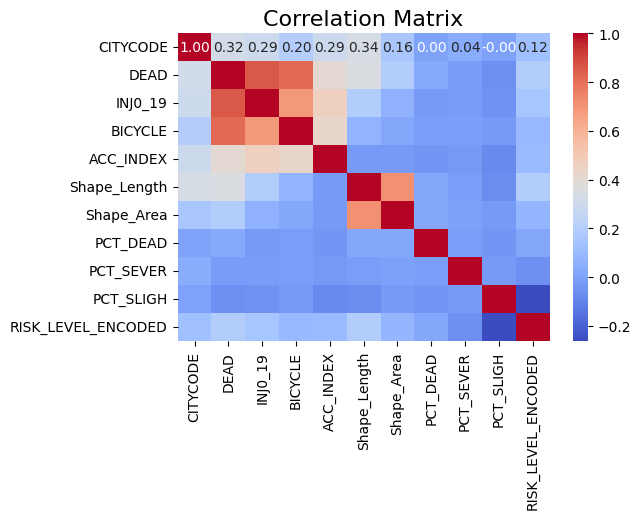

In [29]:
data_with_target = filtered_data

# Evaluate correlation with target variable
print("Evaluating correlation with target variable:")
correlations = data_with_target.corr()['DEAD'].sort_values(ascending=False)
print("Correlations with DEAD:")
print(correlations)

# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data_with_target.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Analysis of the correlations for the 'DEAD' column:
##### 1. Positive correlations with 'DEAD':
####    - 'INJ0_19': Moderate correlation, suggesting a relationship between fatalities and injuries in the 0-19 age group.
####    - 'BICYCLE': Weak to moderate positive correlation, indicating some connection between bicycle-related accidents and fatalities.
####    - 'ACC_INDEX': Weak positive correlation, possibly reflecting the severity of accidents related to fatalities.
####    - 'Shape_Length': Very weak positive correlation.
####
##### 2. Low or negative correlations with 'DEAD':
####    - 'PCT_DEAD': Expected to have a strong internal relationship since it's derived from 'DEAD'.
####    - 'RISK_LEVEL_ENCODED': Very low or almost no correlation.
####    - 'Shape_Area': No clear or very weak correlation.
####    - 'PCT_SEVER', 'PCT_SLIGH': Very weak negative correlations, possibly indicating that higher percentages of severe or slight injuries correspond to fewer fatalities.
####
### Key insights:
#### - The 'DEAD' column is primarily related to variables reflecting severe accidents or young victims, with less connection to geographic features like area or length.
#### - Variables with stronger positive correlations, such as 'INJ0_19' and 'BICYCLE', might serve as important features for predicting fatalities in models.


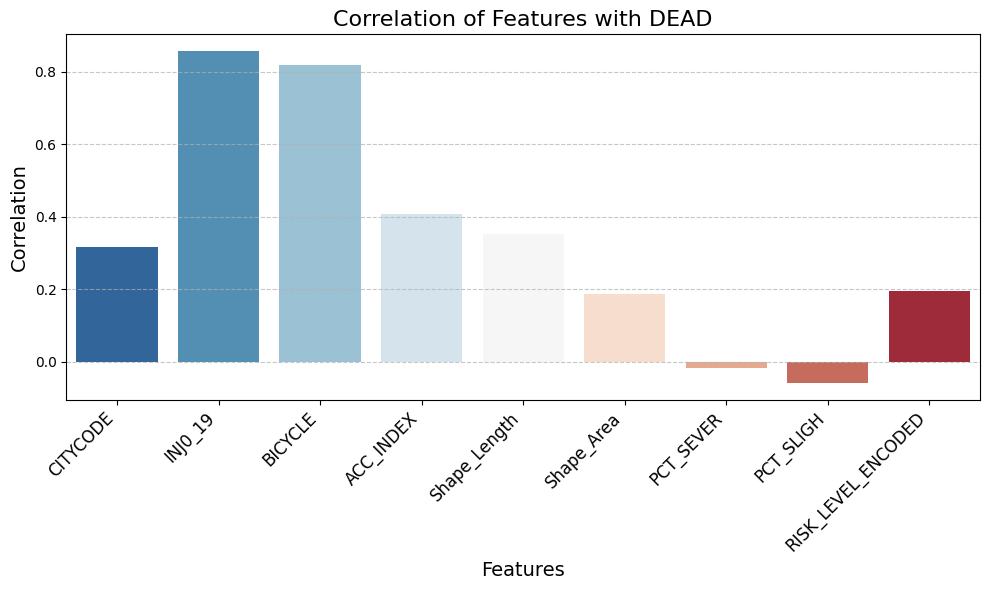

In [35]:
#GPT CODE
# עמודות לניתוח
columns_for_correlation = ['DEAD', 'CITYCODE', 'INJ0_19', 'BICYCLE', 'ACC_INDEX',
                            'Shape_Length', 'Shape_Area', 'PCT_SEVER', 'PCT_SLIGH', 'RISK_LEVEL_ENCODED']

# חישוב מטריצת קורלציה
correlation_matrix = filtered_data[columns_for_correlation].corr()

# מיקוד בקורלציות של DEAD
dead_correlation = correlation_matrix['DEAD'].drop('DEAD')  # הסרת הערך העצמי של DEAD

# יצירת גרף
plt.figure(figsize=(10, 6))
sns.barplot(x=dead_correlation.index, y=dead_correlation.values, palette='RdBu_r')  # RdBu_r הופך את הצבעים
plt.title('Correlation of Features with DEAD', fontsize=16)
plt.ylabel('Correlation', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#END OF GPT CODE

C:\Users\ariel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


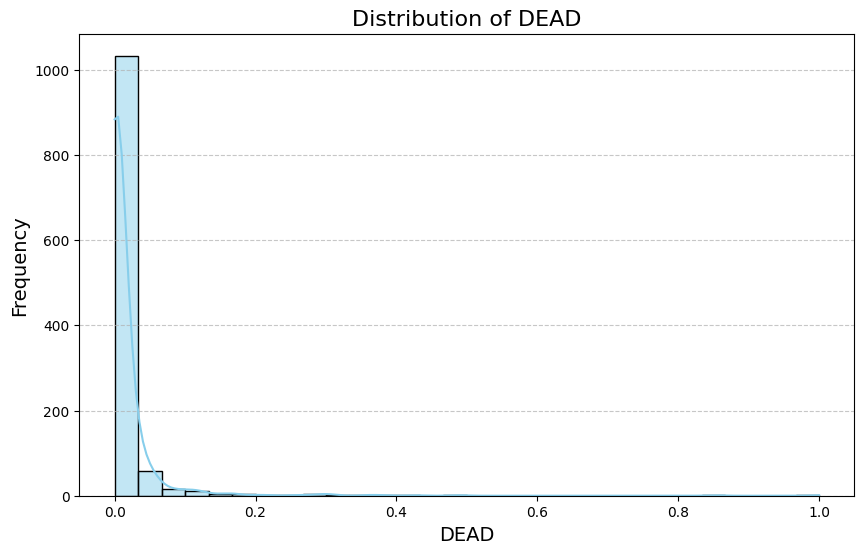

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# גרף התפלגות עם seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['DEAD'], kde=True, bins=30, color='skyblue')  # kde מוסיף עקומה חלקה
plt.title('Distribution of DEAD', fontsize=16)
plt.xlabel('DEAD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### From the graph, we can see that most of the data is distributed with negligible percentages for fatalities, while the remaining data is spread across other percentages. Therefore, we will split the DEAD column into two categories: "Deaths" and "No Deaths"

DEAD_BIN
No Deaths    703
Deaths       436
Name: count, dtype: int64


C:\Users\ariel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


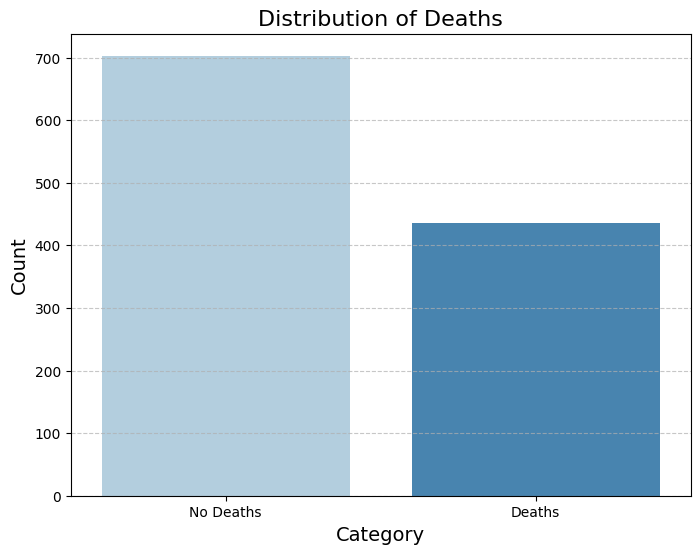

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת עמודת bins
filtered_data['DEAD_BIN'] = pd.cut(
    filtered_data['DEAD'],
    bins=[-1, 0, np.inf],  # חלוקה: ערכים 0 וגדולים מ-0
    labels=['No Deaths', 'Deaths']
)

# וידוא ההתפלגות
print(filtered_data['DEAD_BIN'].value_counts())

# גרף התפלגות
plt.figure(figsize=(8, 6))
sns.countplot(x='DEAD_BIN', data=filtered_data, palette='Blues')
plt.title('Distribution of Deaths', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Selecting key features for the model and setting the target variable (`DEAD_BIN`).
#### Splitting the data into training and testing sets with an 80-20 split for model evaluation.


In [82]:
# עמודות נבחרות למודל
selected_features = ['INJ0_19', 'BICYCLE', 'ACC_INDEX', 'Shape_Length', 'RISK_LEVEL_ENCODED']
X = filtered_data[selected_features]
y = filtered_data['DEAD_BIN']

# פיצול הנתונים
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# המרת עמודת היעד
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Label Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Label Mapping: {'Deaths': 0, 'No Deaths': 1}


#### Initializing a dictionary of classification models with different algorithms, including Logistic Regression, 
#### Decision Tree, Random Forest, Ridge Classifier, and Gradient Boosting. 
#### Each model is configured with specific parameters and a random state for reproducibility.


In [84]:
from sklearn.linear_model import RidgeClassifier
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=3, n_estimators=150, class_weight='balanced', random_state=42),
    'Ridge': RidgeClassifier(random_state=42),  
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, max_depth=3, random_state=42)
}

#### Iterating over all models to evaluate their performance using a pipeline.
#### Each pipeline includes a scaler (StandardScaler) and the respective classifier.
#### Cross-validation is performed to calculate accuracy scores, and the model is trained on the training set.
#### Predictions are made on the test set, and performance metrics such as accuracy and a classification report are displayed.


In [85]:
#CHAT GPT CODE
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Cross-Validation
    scores = cross_val_score(pipeline, X, y_encoded, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {scores.mean():.2f}\n")
    
    # אימון המודל
    pipeline.fit(X_train, y_train)
    
    # ניבוי וביצוע הערכה
    y_pred = pipeline.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)
#END OF GPT CODE

Logistic Regression Cross-Validation Accuracy Scores: [0.62719298 0.71929825 0.78508772 0.76315789 0.78854626]
Logistic Regression Mean Accuracy: 0.74

Model: Logistic Regression
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

      Deaths       0.58      0.78      0.66        80
   No Deaths       0.85      0.70      0.77       148

    accuracy                           0.72       228
   macro avg       0.72      0.74      0.71       228
weighted avg       0.76      0.72      0.73       228

--------------------------------------------------
Decision Tree Cross-Validation Accuracy Scores: [0.75877193 0.72807018 0.77631579 0.79385965 0.81938326]
Decision Tree Mean Accuracy: 0.78

Model: Decision Tree
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

      Deaths       0.61      0.84      0.71        80
   No Deaths       0.89      0.71      0.79       148

    accuracy                           0.7

# Model Performance Analysis

---

## Logistic Regression
- **Cross-Validation Accuracy**: Ranges from 62% to 79%, with a mean accuracy of **74%**, indicating moderate consistency.
- **Test Set Accuracy**: Achieved **72%**, close to the cross-validation mean.
- **Classification Report**:
  - Precision: 0.58 for "Deaths" (less reliable), 0.85 for "No Deaths" (more reliable).
  - Recall: 0.78 for "Deaths" (captures most fatalities), 0.70 for "No Deaths."
  - F1-Score: Higher for "No Deaths" (0.77), showing better performance on non-fatalities.
- **Conclusion**: Struggles with balancing both classes and performs better at predicting "No Deaths."

---

## Decision Tree
- **Cross-Validation Accuracy**: Ranges from 73% to 81%, with a mean accuracy of **78%**, showing strong performance.
- **Test Set Accuracy**: Achieved **75%**, higher than Logistic Regression.
- **Classification Report**:
  - Precision: 0.61 for "Deaths," 0.89 for "No Deaths."
  - Recall: 0.84 for "Deaths," 0.71 for "No Deaths."
  - F1-Score: Moderate for both classes (0.71 for "Deaths," 0.79 for "No Deaths").
- **Conclusion**: A balanced and strong model, outperforming Logistic Regression but slightly weaker at identifying non-fatalities.

---

## Random Forest
- **Cross-Validation Accuracy**: Ranges from 75% to 85%, with a mean accuracy of **79%**.
- **Test Set Accuracy**: Achieved **79%**, consistent with cross-validation results.
- **Classification Report**:
  - Precision: 0.67 for "Deaths," 0.88 for "No Deaths."
  - Recall: 0.80 for "Deaths," 0.79 for "No Deaths."
  - F1-Score: 0.73 for "Deaths" and 0.83 for "No Deaths."
- **Conclusion**: A reliable model with better balance compared to Logistic Regression and Decision Tree.

---

## Ridge Classifier
- **Cross-Validation Accuracy**: Ranges from 62% to 80%, with a mean accuracy of **74%**, showing moderate performance.
- **Test Set Accuracy**: Achieved **74%**, consistent with cross-validation results.
- **Classification Report**:
  - Precision: 0.67 for "Deaths," 0.76 for "No Deaths."
  - Recall: 0.50 for "Deaths" (misses many fatalities), 0.86 for "No Deaths."
  - F1-Score: Moderate for both classes (0.57 for "Deaths" and 0.81 for "No Deaths").
- **Conclusion**: Weaker at identifying fatalities compared to other models.

---

## Gradient Boosting
- **Cross-Validation Accuracy**: Outstanding performance, ranging from 76% to 86%, with a mean accuracy of **79%**.
- **Test Set Accuracy**: Achieved an impressive **82%**, outperforming all other models.
- **Classification Report**:
  - Precision: 0.75 for "Deaths," 0.85 for "No Deaths."
  - Recall: 0.72 for "Deaths," 0.87 for "No Deaths."
  - F1-Score: High for both classes (0.74 for "Deaths" and 0.86 for "No Deaths").
- **Conclusion**: The best-performing model, balancing high precision, recall, and accuracy.

---

## Key Observations
1. **Best Model**: Gradient Boosting stands out with exceptional performance and balanced predictions for both classes.
2. **Trade-Offs**:
   - Logistic Regression and Ridge Classifier are weaker and struggle with predicting "Deaths."
   - Decision Tree and Random Forest provide better balance but are slightly less accurate than Gradient Boosting.
3. **Recommendation**: Use Gradient Boosting for final predictions, as it demonstrates superior accuracy, precision, and recall.


##### This code computes the accuracy of the model on the training dataset (`train_accuracy`) and the test dataset (`test_accuracy`) 
#### using the pipeline's `score` method, which measures the proportion of correctly predicted labels.
##### The results indicate:
#### - **Training Accuracy: 0.91**: The model fits the training data well, correctly predicting 91% of the labels. This indicates a healthy balance without overfitting.
#### - **Test Accuracy: 0.82**: The model performs well on unseen data, achieving 82% accuracy, suggesting good generalization with some room for improvement.


In [86]:
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.91
Test Accuracy: 0.82


# clustering

#### Returned to the original dataset after normalized and removed non-numerical columns, keeping only binary columns.
#### This ensures the data is suitable for numerical modeling while focusing on binary features.


In [43]:
 columns_to_drop = [
    'OID', 'CITY', 'CITYCODE', 'MUNITYPE', 'MUNICIPAL', 'MUNICODE', 
    'YEARMONTH', 'Shape_Length', 'Shape_Area', 'RISK_LEVEL'
]
data = filled_df1.drop(columns=columns_to_drop)

#### - **Accident Severity Index**: Calculates the severity of accidents as the ratio of severe injuries (`SEVER_INJ`) 
####   and fatalities (`DEAD`) to the total number of accidents (`SUMACCIDEN`).
#### - **Vehicle Density**: Computes the density of vehicles as the total number of vehicles (`VEHICLE`) 
####   divided by the area in square kilometers (`AreaSQKM`), indicating traffic density.


In [44]:
# Accident severity index
data['ACC_SEVERITY'] = (data['SEVER_INJ'] + data['DEAD']) / data['SUMACCIDEN']

# Vehicle density
data['VEHICLE_DENSITY'] = data['VEHICLE'] / data['AreaSQKM']


In [45]:
na_per_column = data.isnull().sum(axis=0)
na_per_column

SUMACCIDEN            0
DEAD                  0
SEVER_INJ             0
SLIGH_INJ             0
PEDESTRINJ            0
INJ0_19               0
INJ20_64              0
INJ65_                0
INJTOTAL              0
TOTDRIVERS            0
MOTORCYCLE            0
TRUCK                 0
BICYCLE               0
PRIVATE               0
VEHICLE               0
ACC_INDEX             0
AreaSQKM              0
DISTRICT_דרום         0
DISTRICT_חיפה         0
DISTRICT_ירושלים      0
DISTRICT_מרכז         0
DISTRICT_צפון         0
DISTRICT_תל אביב      0
PCT_DEAD              0
PCT_SEVER             0
PCT_SLIGH             0
RISK_LEVEL_ENCODED    0
ACC_SEVERITY          0
VEHICLE_DENSITY       0
dtype: int64

In [46]:
data.columns

Index(['SUMACCIDEN', 'DEAD', 'SEVER_INJ', 'SLIGH_INJ', 'PEDESTRINJ', 'INJ0_19',
       'INJ20_64', 'INJ65_', 'INJTOTAL', 'TOTDRIVERS', 'MOTORCYCLE', 'TRUCK',
       'BICYCLE', 'PRIVATE', 'VEHICLE', 'ACC_INDEX', 'AreaSQKM',
       'DISTRICT_דרום', 'DISTRICT_חיפה', 'DISTRICT_ירושלים', 'DISTRICT_מרכז',
       'DISTRICT_צפון', 'DISTRICT_תל אביב', 'PCT_DEAD', 'PCT_SEVER',
       'PCT_SLIGH', 'RISK_LEVEL_ENCODED', 'ACC_SEVERITY', 'VEHICLE_DENSITY'],
      dtype='object')

#### Check for infinite or large values and handle them

In [48]:
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
data = data.dropna()

## This code uses K-Means clustering to determine the optimal number of clusters (`k`) for the dataset:
### - **Inertia Calculation**: For each value of `k` (from 1 to 10), it calculates the inertia, 
###   which measures the sum of squared distances between data points and their cluster centroids.
### - **Elbow Method**: Plots the inertia against the number of clusters (`k`) to identify the "elbow point," 
###   where adding more clusters provides diminishing returns in reducing inertia, indicating the optimal `k`.


C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\clust

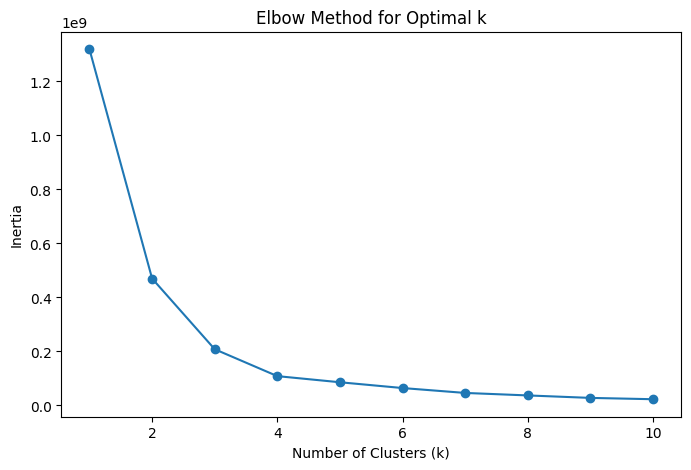

In [49]:
from sklearn.cluster import KMeans
# Perform K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Observations from the Elbow Curve:
- From the graph, we can see that the curve bends at **K=3** or **K=4**.
- Therefore, we will explore clustering the data into 3 groups or 4 groups to determine the optimal segmentation.


In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
data['KMeans_Cluster'] = kmeans_labels

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### PCA vs t-SNE

- **PCA (Principal Component Analysis)**: Reduces dimensions by transforming data into principal components, preserving maximum variance. It is fast and suitable for linear relationships, often used for dimensionality reduction in modeling.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Focuses on preserving local relationships in data, ideal for non-linear structures. It is commonly used for visualizing high-dimensional data in 2D or 3D.
- **Comparison**: PCA is better for linear transformations and modeling, while t-SNE excels in visualizing complex data patterns.


In [51]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

In [52]:
# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

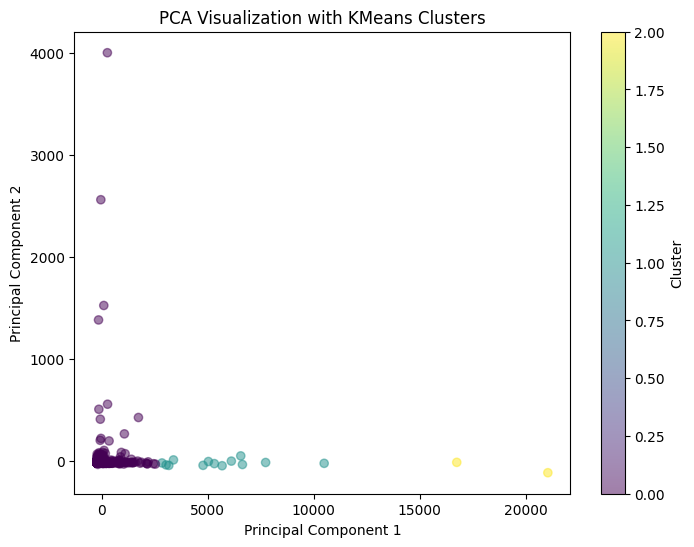

In [53]:
# Plot PCA results for KMeans
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

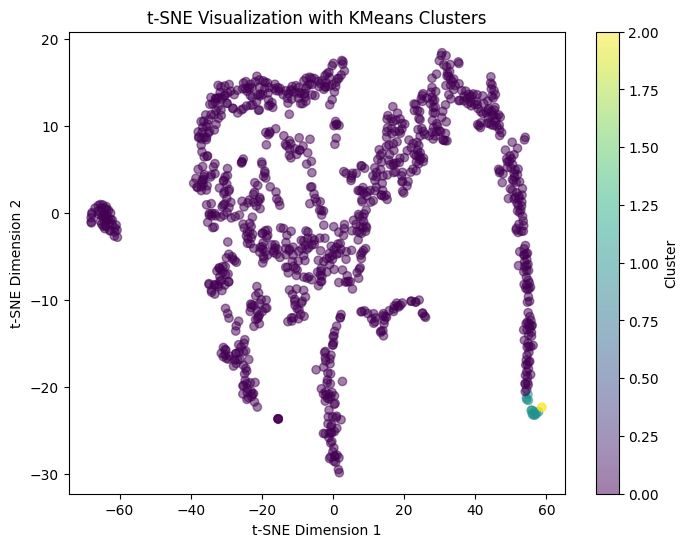

In [54]:
# Plot t-SNE results for KMeans
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization with KMeans Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

# **Explanation of PCA and t-SNE Visualizations for KMeans Clustering**

## **1. PCA Visualization**
The first graph shows the **Principal Component Analysis (PCA)** for the KMeans clusters. PCA reduces the dataset to two dimensions while retaining as much variance as possible.

- **X-Axis (Principal Component 1):** Represents the dimension with the highest variance in the data.
- **Y-Axis (Principal Component 2):** Represents the dimension with the second highest variance.
- **Color:** Each color represents a cluster identified by KMeans (Cluster 0, Cluster 1, and Cluster 2).
- **Key Observations:**
  - The clusters are mostly concentrated near the origin, with one or two clusters extending far along Principal Component 1.
  - Cluster separation is limited, suggesting PCA may not fully capture the distinction between clusters in the dataset.

---

## **2. t-SNE Visualization**
The second graph visualizes the KMeans clusters using **t-Distributed Stochastic Neighbor Embedding (t-SNE)**, a technique designed to represent high-dimensional data in two dimensions by preserving the local structure of the data.

- **X-Axis (t-SNE Dimension 1):** Represents a non-linear projection of the dataset in one dimension.
- **Y-Axis (t-SNE Dimension 2):** Represents another non-linear projection of the dataset in a second dimension.
- **Color:** Each color represents a KMeans cluster (Cluster 0, Cluster 1, and Cluster 2).
- **Key Observations:**
  - t-SNE reveals more detailed separation between clusters compared to PCA.
  - Cluster 2 (yellow) is well-separated from Clusters 0 and 1.
  - Some overlap exists between Clusters 0 (purple) and 1 (teal), indicating similarities in certain local regions.

---

## **Summary**
- PCA is useful for visualizing global variance but may not adequately separate clusters in this case.
- t-SNE provides a more refined local structure of the data, highlighting clearer separation between clusters.
- Both visualizations confirm the presence of three distinct clusters, as determined by KMeans.


In [55]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=30, min_samples=15)
dbscan_labels = dbscan.fit_predict(data)
data['DBSCAN_Cluster'] = dbscan_labels


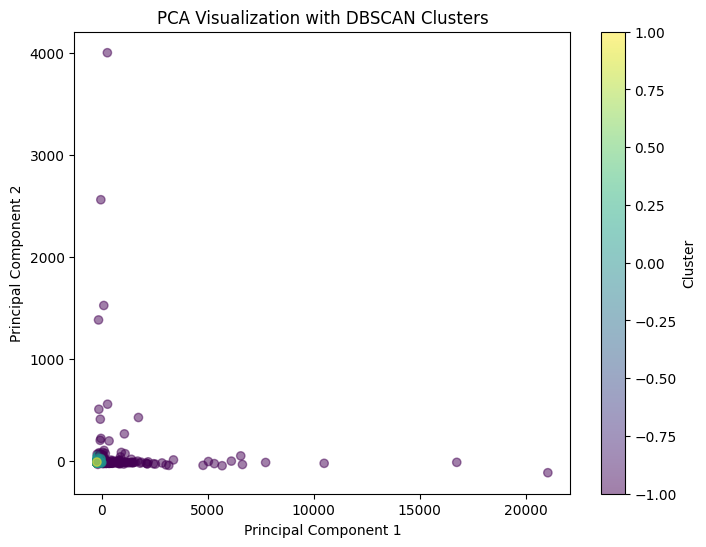

In [56]:
# Plot PCA results for DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization with DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


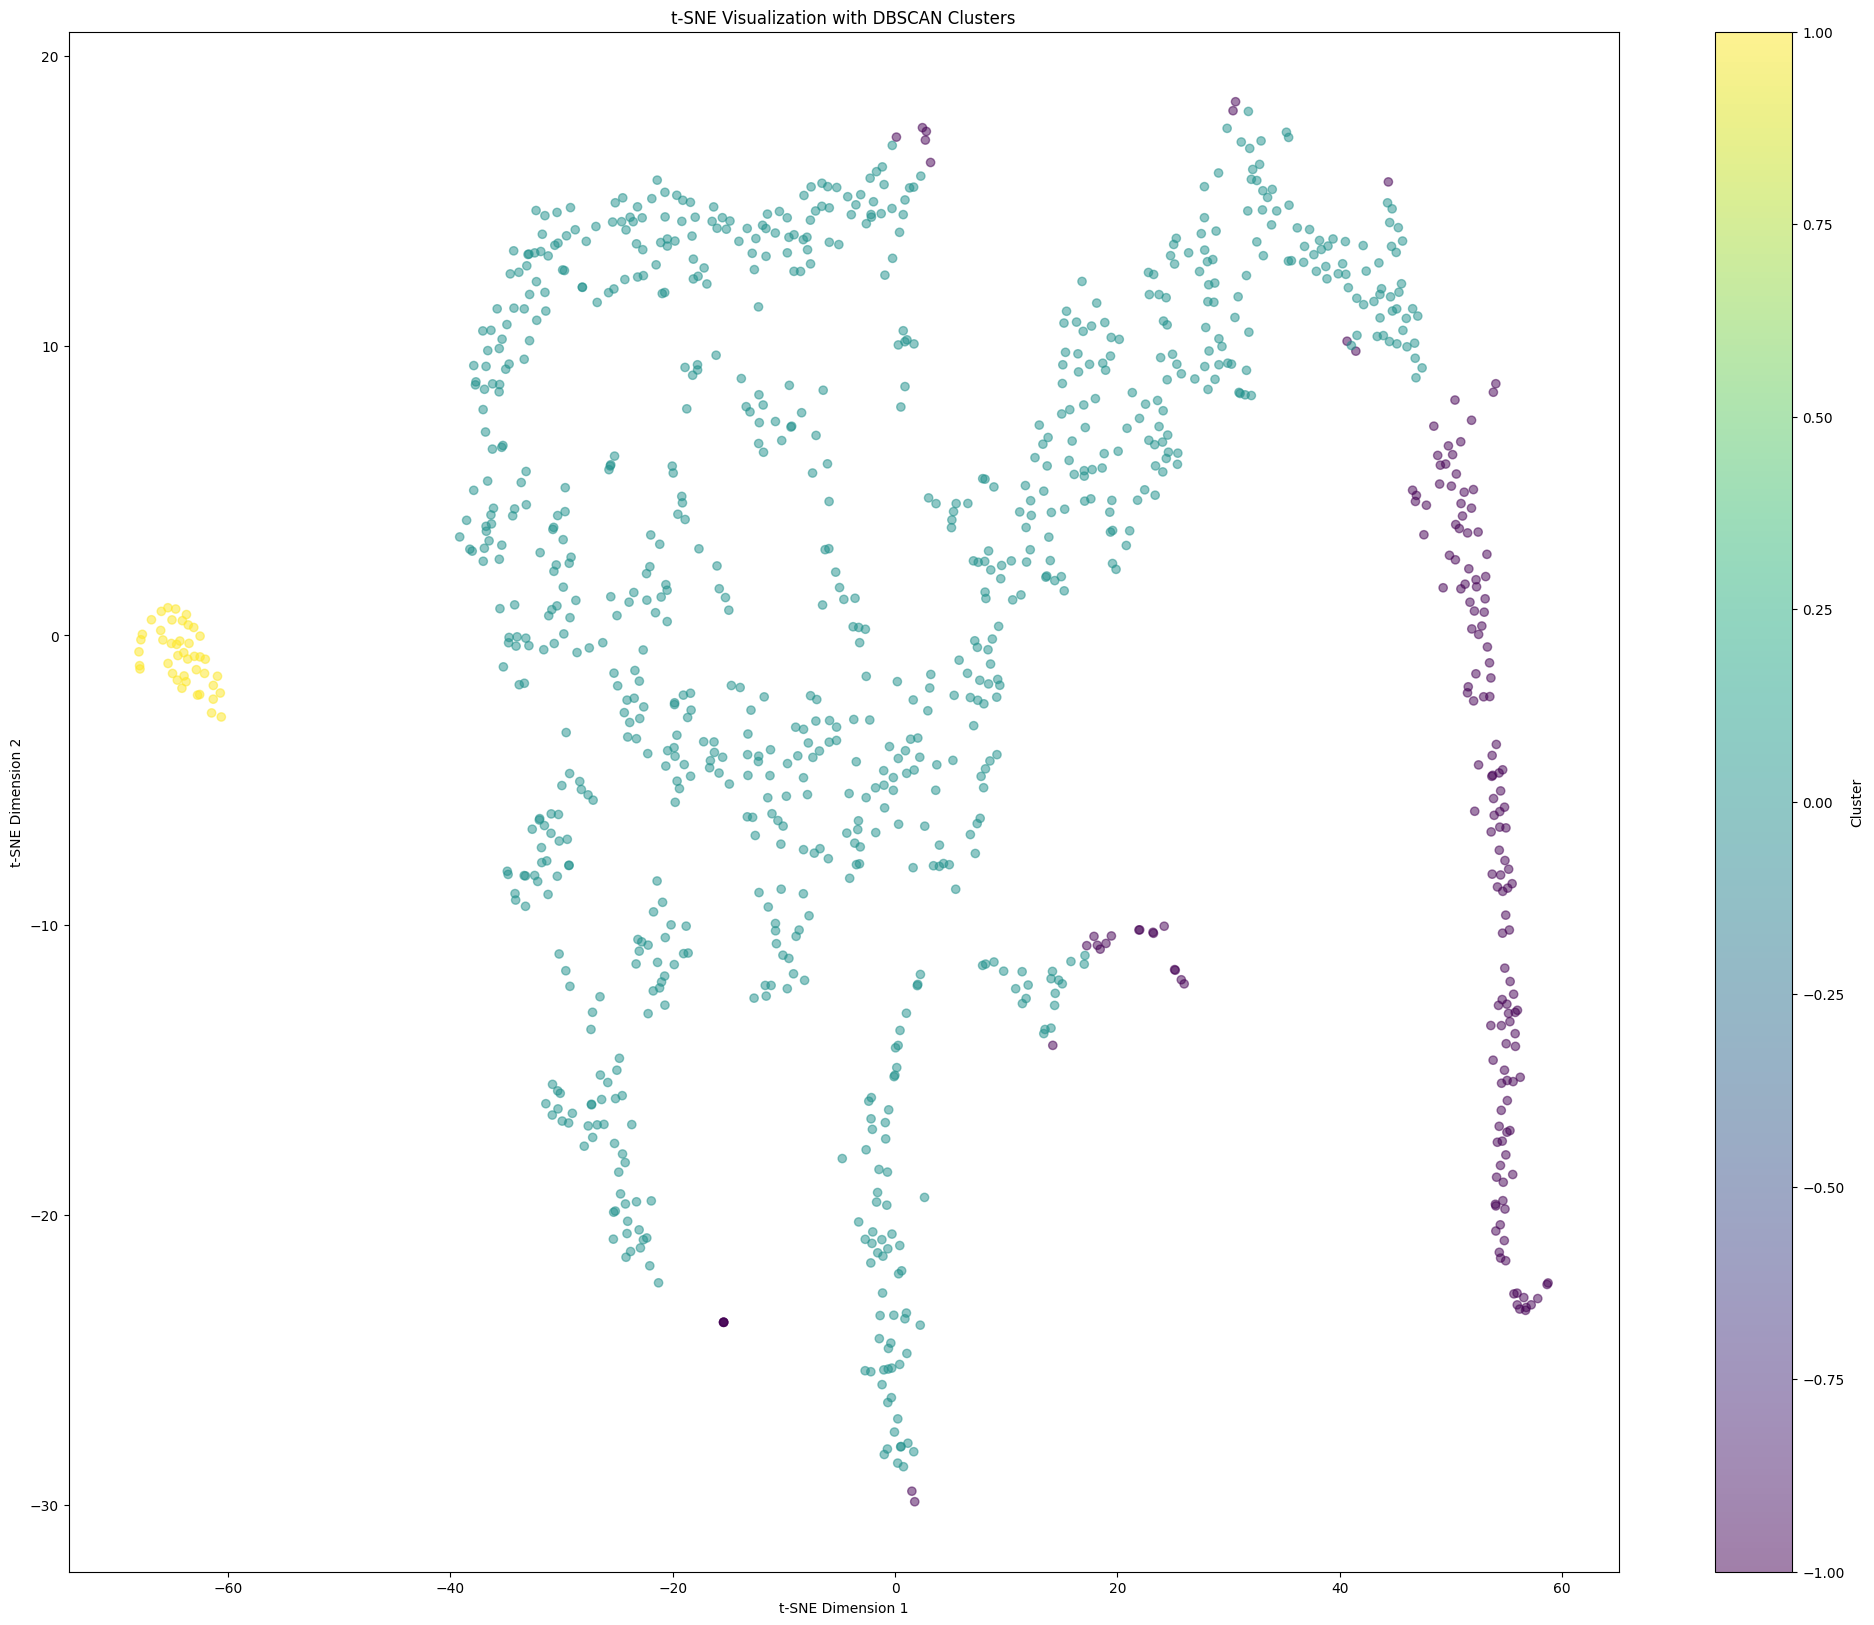

In [57]:
# Plot t-SNE results for DBSCAN
plt.figure(figsize=(25, 20))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization with DBSCAN Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

### **PCA and t-SNE Visualization for DBSCAN Clusters**

#### **PCA Visualization with DBSCAN Clusters**
The PCA visualization shows the clustering result of DBSCAN in a 2-dimensional space after reducing the original dataset's dimensions using Principal Component Analysis (PCA). Here's what we observe:
1. **Cluster Separation**:
   - Clusters are not well-separated, and most data points seem concentrated in a dense region near the origin.
   - The small number of points spread far from the origin may represent outliers or noise, as indicated by the DBSCAN algorithm.
   
2. **Noise Handling**:
   - DBSCAN assigns points that do not belong to a cluster as noise (cluster label -1). These points appear sparsely distributed in the PCA plot.

3. **Interpretation**:
   - The clustering result indicates that DBSCAN identified dense regions (clusters) but had difficulty separating clusters distinctly due to overlapping areas in reduced dimensions.

---

#### **t-SNE Visualization with DBSCAN Clusters**
The t-SNE visualization provides another perspective on the clustering results by projecting high-dimensional data into a 2D space. Observations:
1. **Cluster Formation**:
   - Unlike PCA, t-SNE better captures the local relationships, making distinct clusters more identifiable.
   - Clusters are more clearly separated, with one cluster (yellow) forming a distinct group and other clusters spread out in elongated shapes.

2. **Noise Points**:
   - Noise points (label -1) are scattered across the space, showing the algorithm's sensitivity to identifying areas without sufficient density for clustering.

3. **Interpretation**:
   - t-SNE highlights DBSCAN's ability to separate distinct groups while identifying sparse points as noise. However, overlapping clusters might indicate shared features among the groups.

---

### **Key Takeaways**
- **DBSCAN Strengths**:
  - Effective at identifying dense clusters and treating outliers as noise.
  - t-SNE emphasizes the clustering's local structure, showing distinct groups better than PCA.
  
- **DBSCAN Weaknesses**:
  - Struggles with overlapping clusters, particularly in high-dimensional spaces, which is visible in the PCA plot.


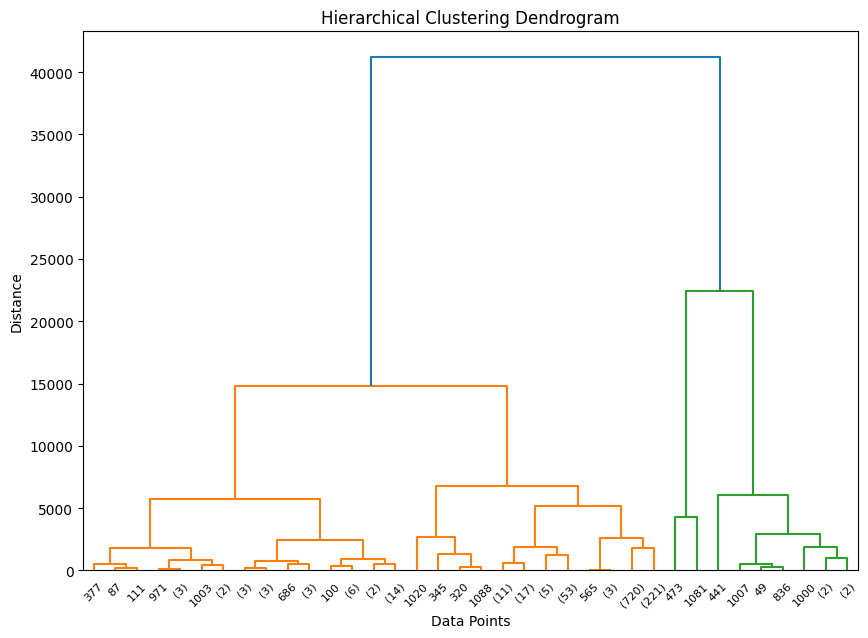

In [75]:
# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)  # Adjust 'p' for depth of tree
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [59]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold (e.g., distance=15000)
threshold = 15000
clusters = fcluster(linked, t=threshold, criterion='distance')

# Add the clusters to the dataset
data['Agg_Cluster'] = clusters

# Check the number of clusters
print(f"Number of clusters: {len(set(clusters))}")


Number of clusters: 3


In [60]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data)
data['Agg_Cluster'] = agg_labels

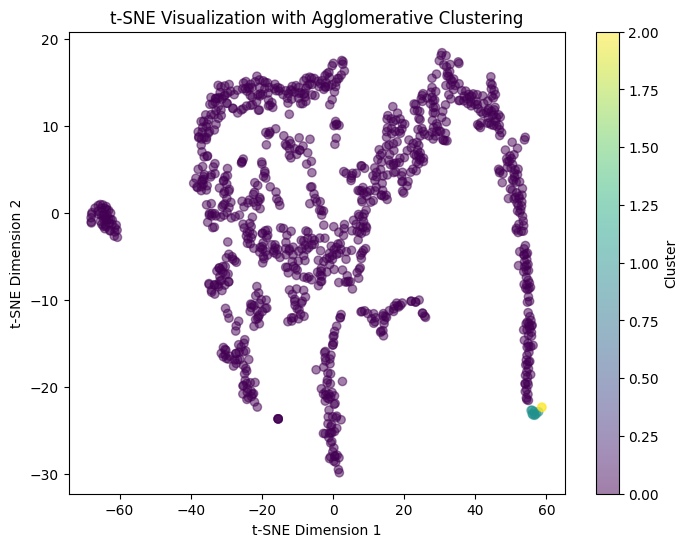

In [61]:
# Plot t-SNE results for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization with Agglomerative Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


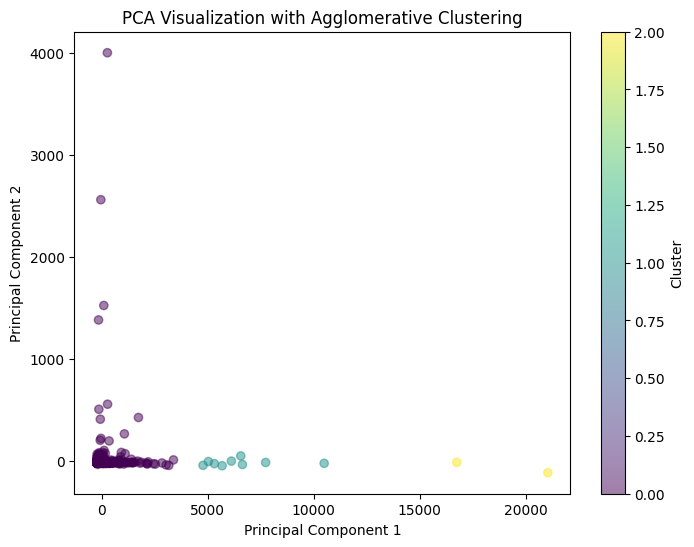

In [62]:
# Plot PCA results for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization with Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Clustering Analysis (Agglomerative Clustering)

---

## **1. Dendrogram Visualization**
The dendrogram provides a visual representation of the hierarchical clustering process:

- **Y-Axis (Distance):** The height at which two clusters merge indicates their dissimilarity. Larger distances represent more distinct clusters.
- **X-Axis (Data Points):** Represents the individual data points grouped progressively into clusters.
- **Key Observations:**
  - The large vertical distances in the upper levels suggest that the data naturally forms distinct clusters.
  - Using a threshold distance around 15,000 would result in 3 clusters.

---

## **2. PCA Visualization**
The PCA plot reduces the dataset's dimensions to 2 principal components, visualizing how data points are distributed across clusters:

- **Cluster Separation:**
  - Data points belonging to **Cluster 0 (purple)** are tightly grouped near the origin, indicating low variance.
  - **Cluster 1 (teal)** is slightly spread out, suggesting moderate variance.
  - **Cluster 2 (yellow)**, while sparse, has the most variance, indicating a small but distinct group of data points.
- **Key Insight:** PCA helps confirm the separation of clusters but struggles to handle the non-linear patterns in the data.

---

## **3. t-SNE Visualization**
The t-SNE plot provides a non-linear, two-dimensional representation of the clusters:

- **Cluster 0 (purple):**
  - The largest cluster, spread widely, showing a diverse group of municipalities.
- **Cluster 1 (teal):**
  - A more compact cluster, with moderate internal cohesion.
- **Cluster 2 (yellow):**
  - Highly distinct and compact, reflecting municipalities with extreme characteristics.
- **Key Insight:** t-SNE highlights the differences between clusters better than PCA, capturing non-linear patterns in the data.

---

## **Summary**
- Agglomerative Clustering successfully divides the data into three meaningful clusters.
- The dendrogram helps determine the optimal number of clusters (e.g., 3 clusters at a distance threshold of 15,000).
- PCA and t-SNE visualizations validate the clustering results, with t-SNE providing better separation of clusters.


In [63]:
def evaluate_clustering(data, labels, method_name):
    silhouette = silhouette_score(data, labels) if len(set(labels)) > 1 else None
    davies_bouldin = davies_bouldin_score(data, labels) if len(set(labels)) > 1 else None
    print(f"{method_name} Silhouette Score: {silhouette}")
    print(f"{method_name} Davies-Bouldin Index: {davies_bouldin}")

# Evaluate each clustering method
evaluate_clustering(data, kmeans_labels, "KMeans")
evaluate_clustering(data, dbscan_labels, "DBSCAN")
evaluate_clustering(data, agg_labels, "Agglomerative Clustering")


KMeans Silhouette Score: 0.9473212787191285
KMeans Davies-Bouldin Index: 0.31163562106706794
DBSCAN Silhouette Score: 0.09440475173235903
DBSCAN Davies-Bouldin Index: 1.0867092459155885
Agglomerative Clustering Silhouette Score: 0.9536779625117731
Agglomerative Clustering Davies-Bouldin Index: 0.25427060715152805


C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


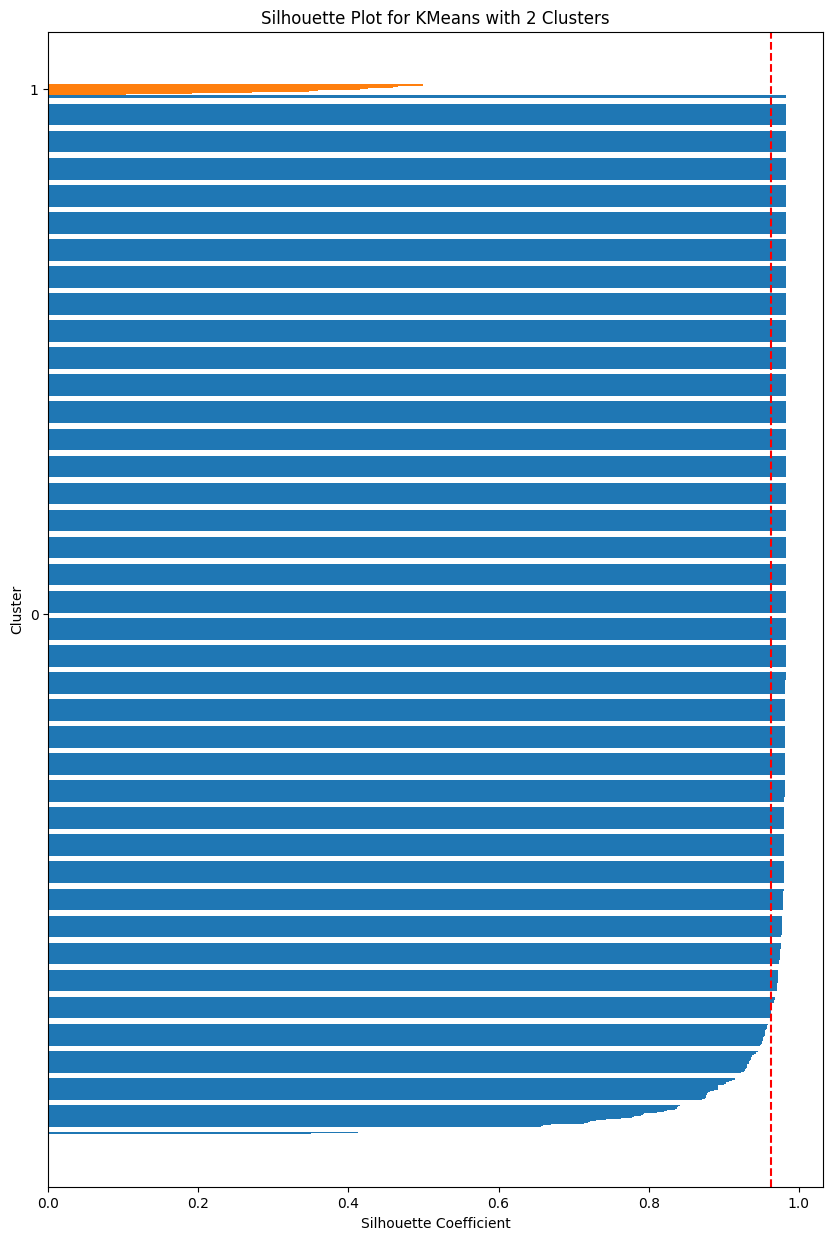

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


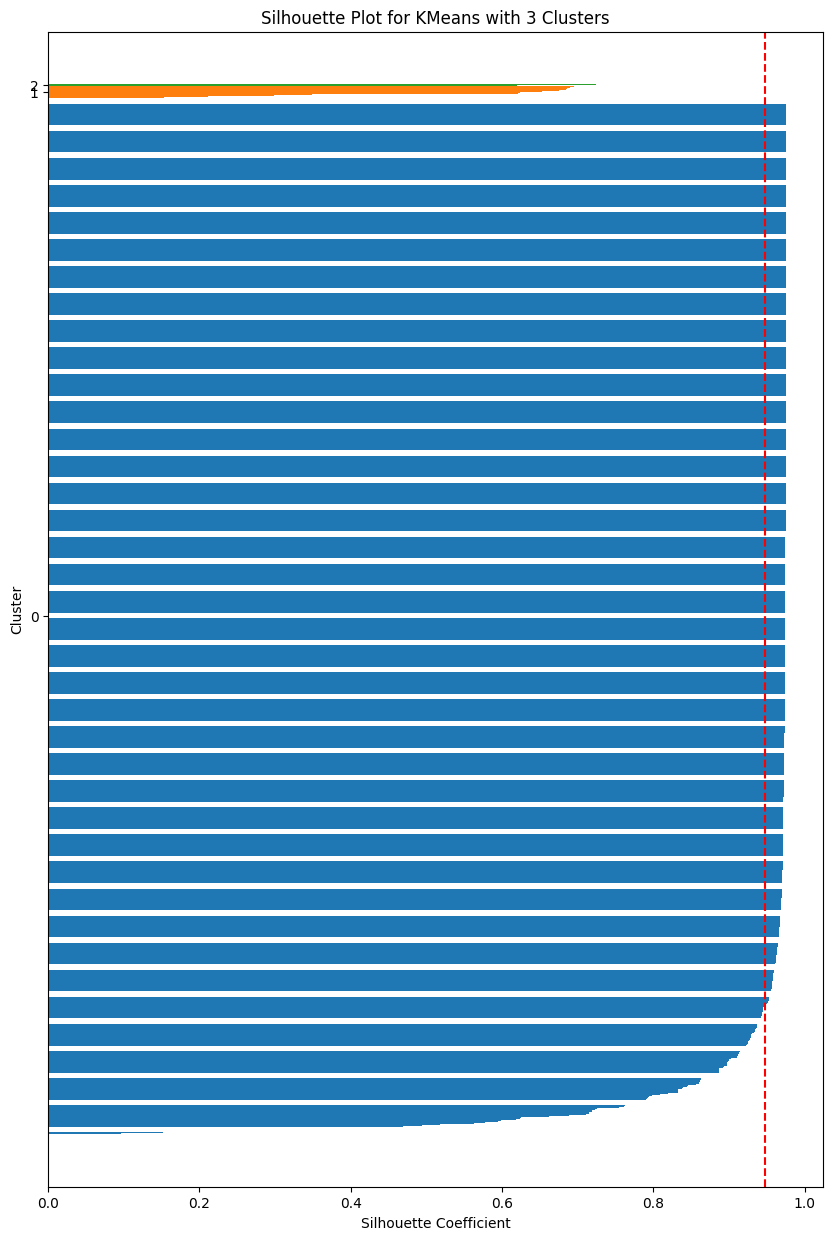

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


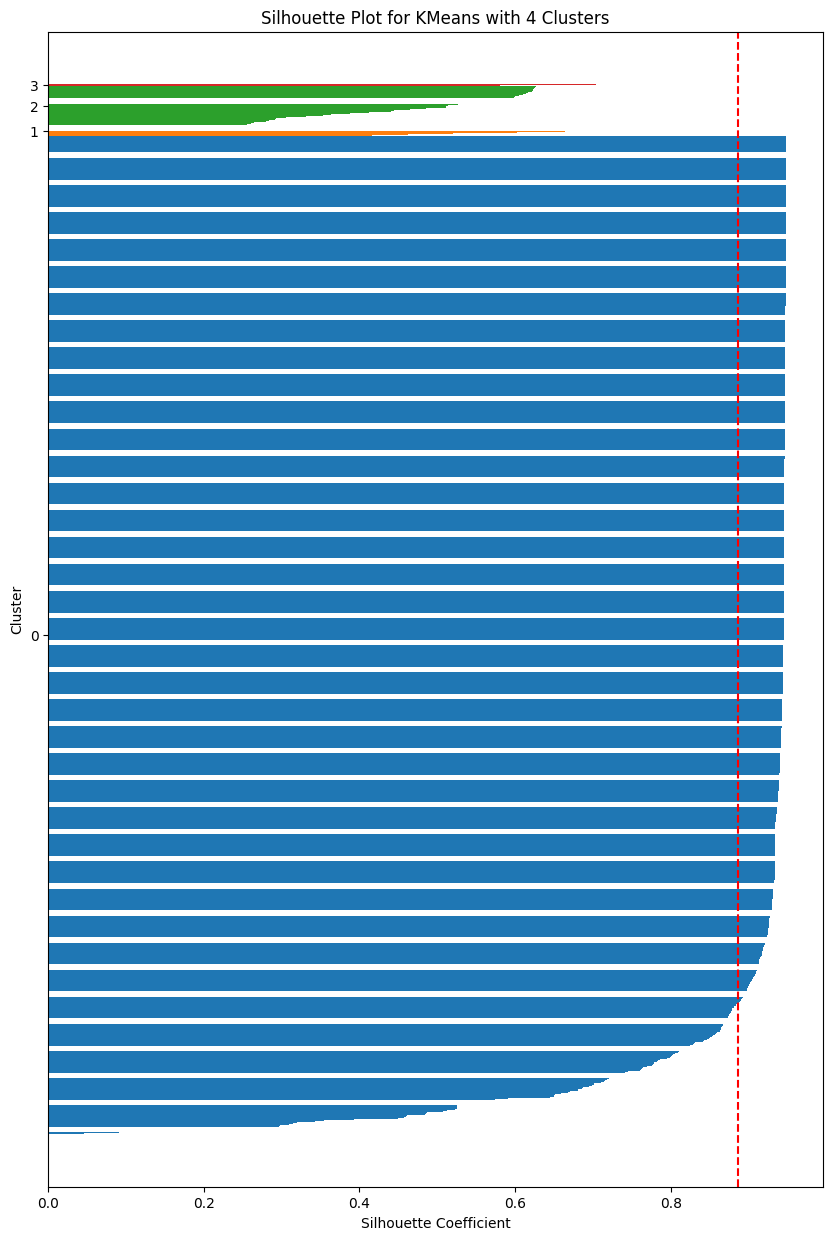

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


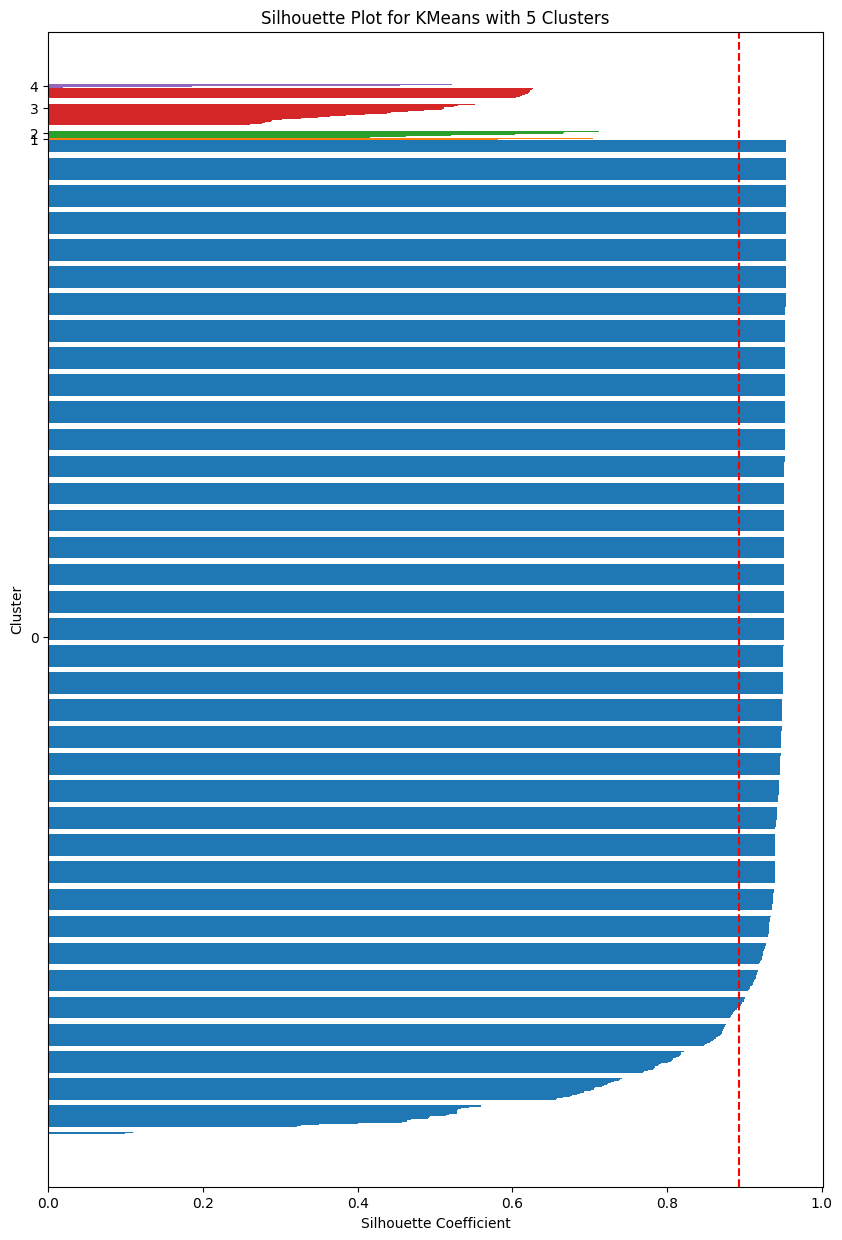

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


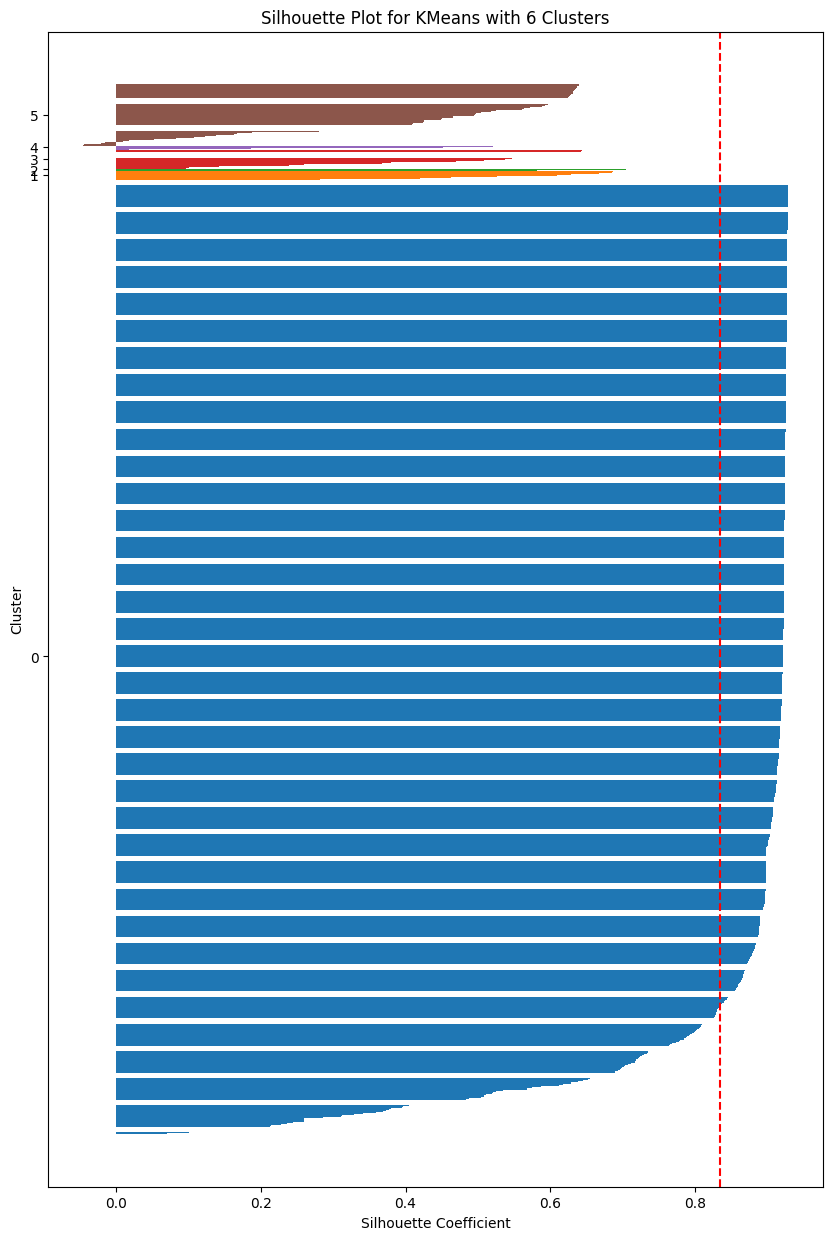

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


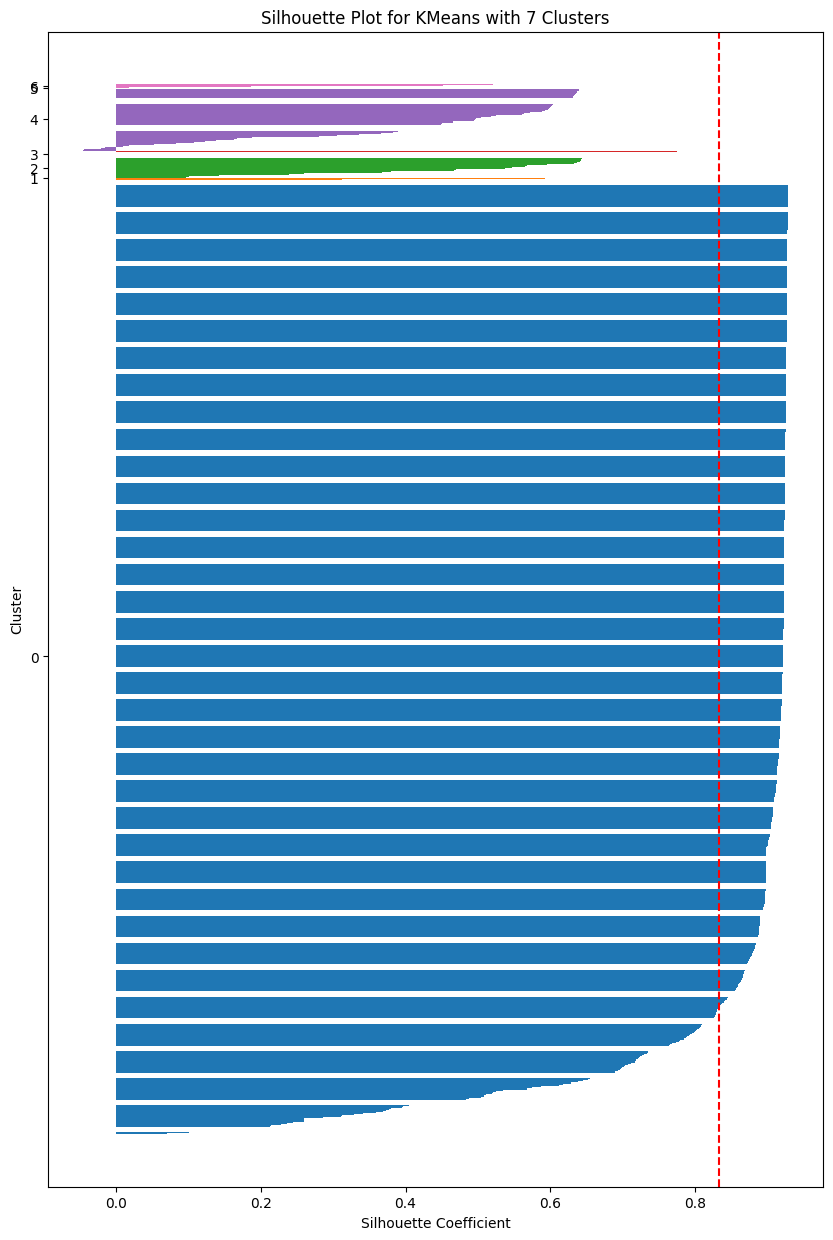

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


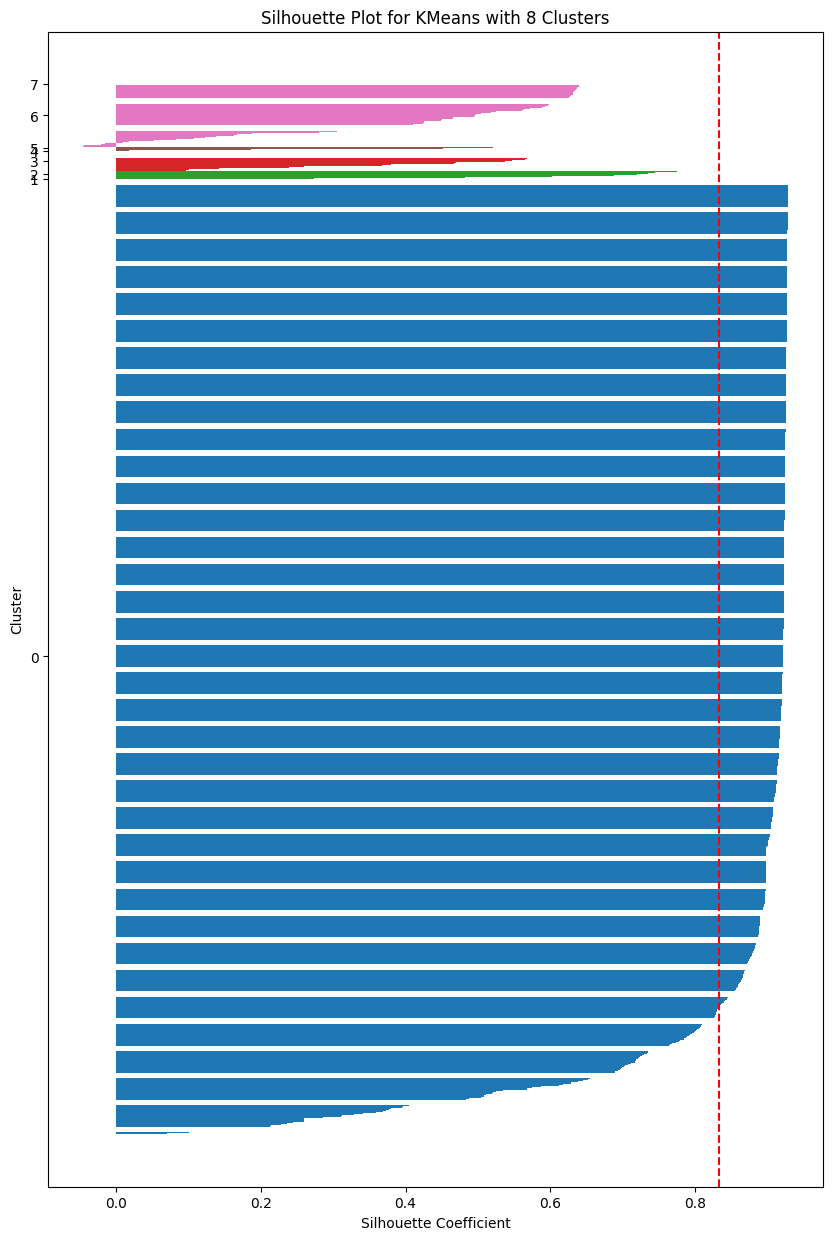

C:\Users\ariel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


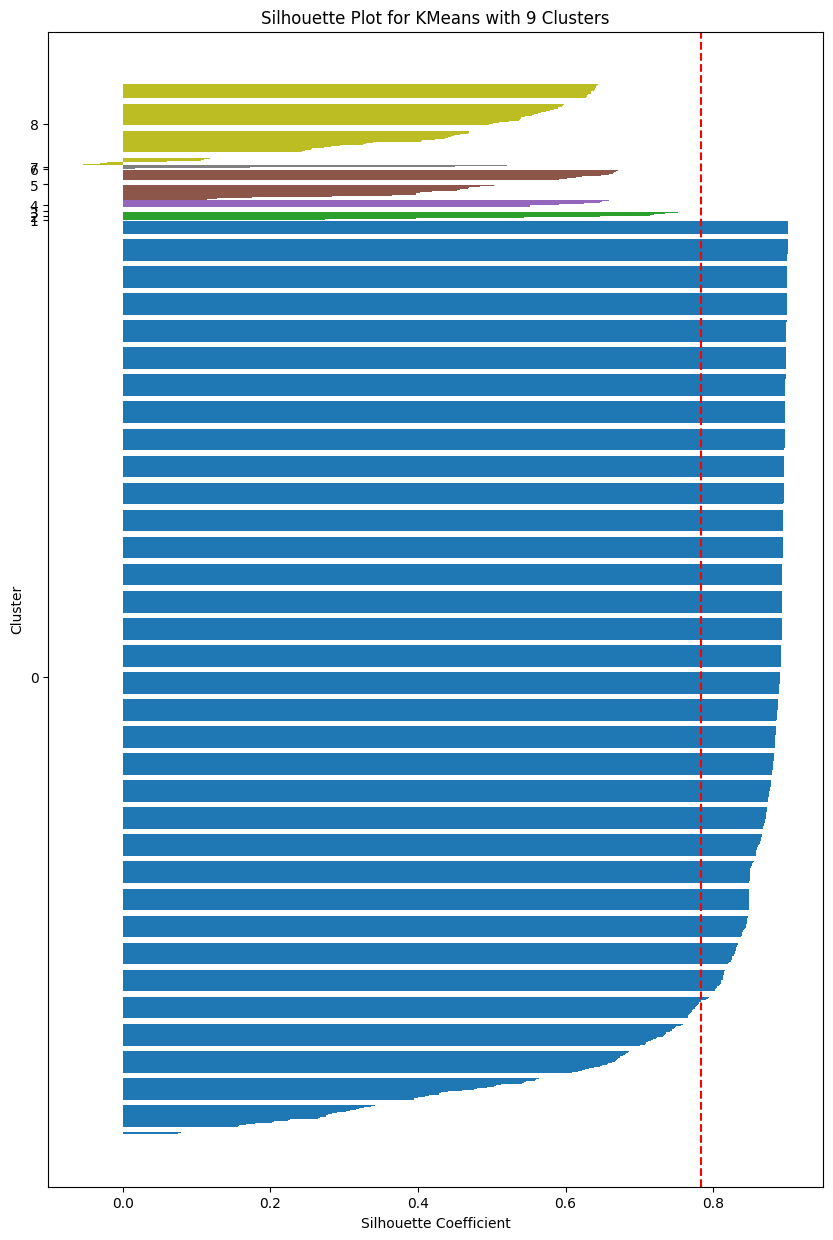

In [69]:
# Generate multiple silhouette plots for different K in KMeans
def silhouette_analysis_kmeans(data, max_k=10):
    for n_clusters in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_vals = silhouette_samples(data, labels)
        cluster_labels = np.unique(labels)
        y_lower, y_upper = 0, 0
        yticks = []

        plt.figure(figsize=(10, 15))
        for i, cluster in enumerate(cluster_labels):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
            yticks.append((y_lower + y_upper) / 2)
            y_lower += len(cluster_silhouette_vals)

        plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
        plt.yticks(yticks, cluster_labels)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette Coefficient')
        plt.title(f'Silhouette Plot for KMeans with {n_clusters} Clusters')
        plt.show()

# Perform silhouette analysis for KMeans with up to 9 clusters
silhouette_analysis_kmeans(data, max_k=9)


# Analysis of KMeans, DBSCAN, and Agglomerative Clustering Results and Silhouette Graphs

## **Silhouette and Davies-Bouldin Scores**

### **KMeans Clustering**
- **Silhouette Score**: 0.9473
  - Indicates very well-defined clusters with high cohesion within clusters and separation between them.
- **Davies-Bouldin Index**: 0.3116
  - Lower value indicates better-defined clusters with minimal overlap.

### **DBSCAN Clustering**
- **Silhouette Score**: 0.0944
  - Low score shows poor cluster definition with overlapping clusters or outliers influencing the clustering.
- **Davies-Bouldin Index**: 1.0867
  - Higher value compared to KMeans and Agglomerative Clustering suggests less distinct clusters.

### **Agglomerative Clustering**
- **Silhouette Score**: 0.9537
  - Highest score among the methods, indicating very well-defined clusters.
- **Davies-Bouldin Index**: 0.2543
  - Lowest value among the methods, showing the most distinct clustering.

---

## **Silhouette Graph Insights**

### **For KMeans (with increasing numbers of clusters, 2 to 9):**
1. **2 Clusters**:
   - High average silhouette coefficient but may oversimplify the clustering, as shown by a single dominant cluster.
2. **3 Clusters**:
   - Improved separation among clusters with a balance between cluster sizes.
3. **4 to 9 Clusters**:
   - Gradual decrease in silhouette coefficient due to increased fragmentation and smaller cluster sizes.

### **Implications for KMeans**
- The **elbow point** from the silhouette coefficients suggests the optimal number of clusters is around **3 to 4**.

---

## **Comparison Between Clustering Methods**

1. **KMeans**:
   - Best for well-separated clusters.
   - High Silhouette Score and low Davies-Bouldin Index make it a reliable method for this dataset.

2. **DBSCAN**:
   - Struggles with outliers or noise in the dataset.
   - Poor performance metrics (Silhouette and Davies-Bouldin scores) suggest this method isn't suitable for this dataset.

3. **Agglomerative Clustering**:
   - Outperforms both KMeans and DBSCAN with the highest Silhouette Score and lowest Davies-Bouldin Index.
   - Works well for hierarchical structures in data and gives the best cluster separation.

---

## **Recommendations**
- Use **Agglomerative Clustering** if the goal is to achieve the highest cluster quality.
- Use **KMeans** if interpretability and computational efficiency are priorities, particularly with **3-4 clusters**.
- Avoid **DBSCAN** for this dataset, as it performs poorly on all metrics.


In [73]:
#GPT CODE
def plot_silhouette(data, labels, method_name):
    from sklearn.metrics import silhouette_samples
    import matplotlib.pyplot as plt
    import numpy as np
    
    silhouette_vals = silhouette_samples(data, labels)
    cluster_labels = np.unique(labels)
    y_lower, y_upper = 0, 0
    yticks = []

    plt.figure(figsize=(8, 6))
    for i, cluster in enumerate(cluster_labels):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.title(f'Silhouette Plot for {method_name}')
    plt.show()
#GPT CODE END

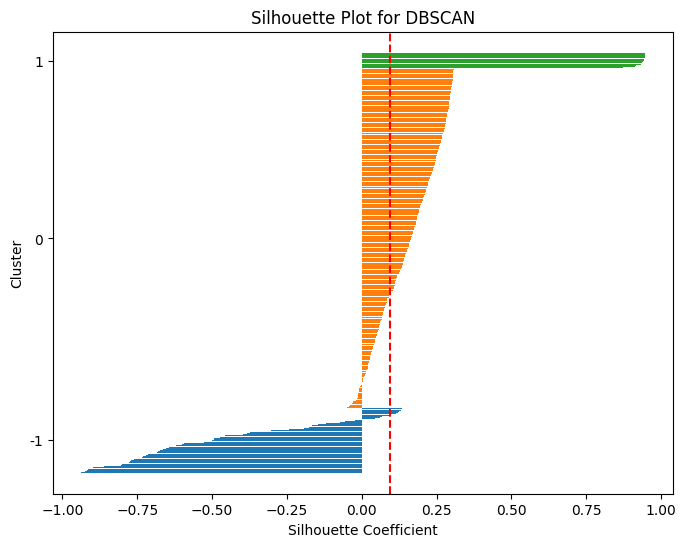

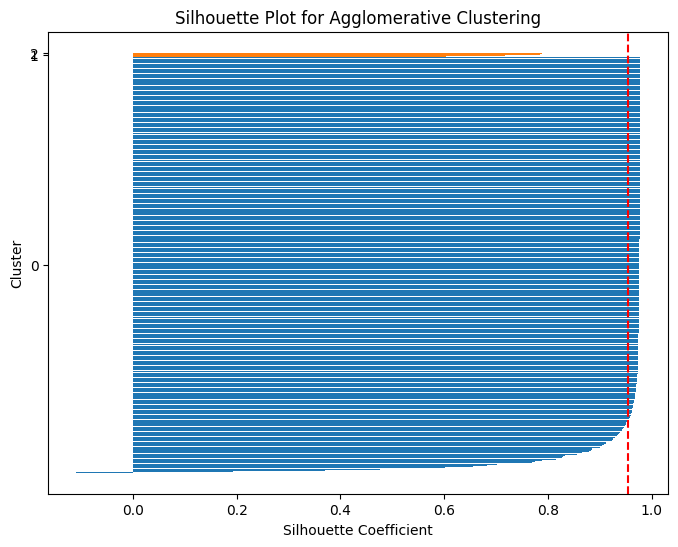

In [74]:
# Plot silhouette for DBSCAN
plot_silhouette(data, dbscan_labels, "DBSCAN")

# Plot silhouette for Agglomerative Clustering
plot_silhouette(data, agg_labels, "Agglomerative Clustering")


# Analysis of Silhouette Plots for Agglomerative Clustering and DBSCAN

## **Agglomerative Clustering Silhouette Plot**
### Silhouette Coefficient Overview:
- Most of the points have a **silhouette coefficient close to 1**, indicating strong and well-defined clusters.
- The **red dashed line** marks the **average silhouette score**, which is very high and aligns with the silhouette score for Agglomerative Clustering: **0.9537**.

### Cluster Characteristics:
- The plot shows compact and distinct clusters with almost no negative silhouette coefficients.
- Indicates that data points within each cluster are very similar, and the separation between clusters is clear.

### Conclusion:
- Agglomerative Clustering performs exceptionally well, producing highly separated and compact clusters.

---

## **DBSCAN Silhouette Plot**
### Silhouette Coefficient Overview:
- Silhouette coefficients vary widely, with some points having **negative values**, indicating poor cluster assignment or points close to the cluster boundaries.
- The **average silhouette score** (marked by the red dashed line) is **0.0944**, suggesting weak clustering.

### Cluster Characteristics:
- The plot reveals significant differences in the quality of clustering:
  - Cluster `0` (orange) and Cluster `1` (green) have mostly positive silhouette coefficients.
  - Noise points (`-1`, blue) have a wide range of coefficients, including many negative values.

### Conclusion:
- DBSCAN struggles with this dataset, as the clusters are less distinct and have overlapping regions.
- The presence of many noise points and negative coefficients indicates suboptimal clustering.

---

## **Comparison Between Methods**

| Metric                     | Agglomerative Clustering | DBSCAN  |
|----------------------------|--------------------------|---------|
| **Silhouette Score**       | **0.9537**               | 0.0944  |
| **Davies-Bouldin Index**   | **0.2543**               | 1.0867  |

### Observations:
1. **Agglomerative Clustering**:
   - Strong performance with well-defined clusters.
   - High silhouette score and low Davies-Bouldin index indicate excellent clustering quality.

2. **DBSCAN**:
   - Poor performance on this dataset.
   - The low silhouette score and high Davies-Bouldin index indicate overlapping clusters and noise.



               SUMACCIDEN      DEAD  SEVER_INJ  SLIGH_INJ  PEDESTRINJ  \
Agg_Cluster                                                             
0              136.319109  0.011132   0.005799   0.008524    0.003738   
1             6707.222222  0.326241   0.238458   0.354312    0.247482   
2            19125.500000  0.925532   0.920091   0.952754    0.836587   

              INJ0_19  INJ20_64    INJ65_  INJTOTAL  TOTDRIVERS  ...  \
Agg_Cluster                                                      ...   
0            0.009300  0.008031  0.006033  0.008370    0.006621  ...   
1            0.277868  0.329790  0.394596  0.348957    0.324984  ...   
2            0.750539  0.907717  0.895525  0.951175    0.885541  ...   

             DISTRICT_צפון  DISTRICT_תל אביב  PCT_DEAD  PCT_SEVER  PCT_SLIGH  \
Agg_Cluster                                                                    
0                 0.398887          0.011132  2.686775   4.455003   2.779691   
1                 0.000000       

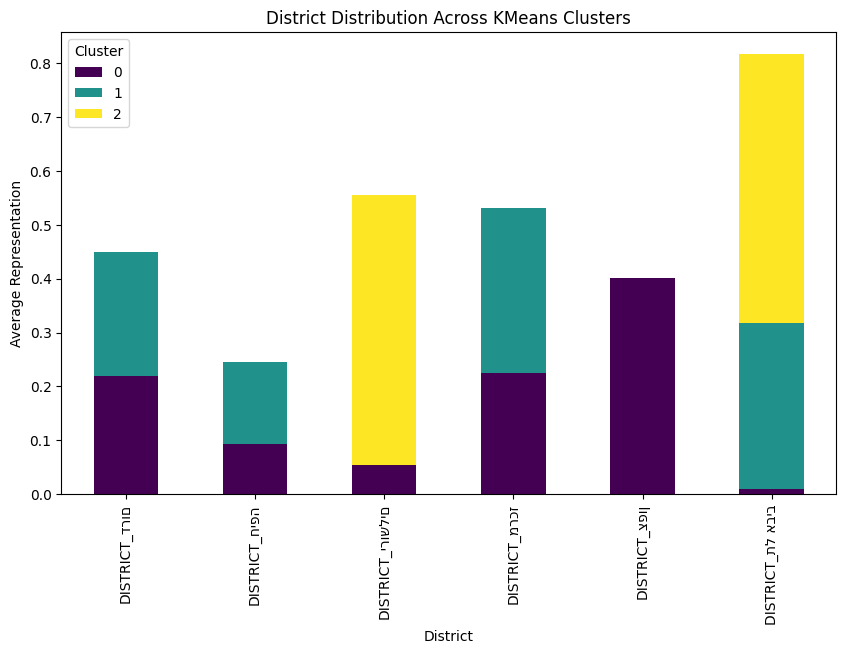

Model Accuracy (KMeans as target): 1.0


In [68]:
# Additional analysis for Agglomerative Clustering
def analyze_clusters_agg(data):
    # Group by Agg_Cluster and compute mean for each feature
    grouped_data = data.groupby('Agg_Cluster').mean()

    # Display the group means
    print(grouped_data)

    # Save to a CSV file for further exploration if needed
    grouped_data.to_csv("agg_cluster_analysis.csv")


# Perform the analysis for Agglomerative Clustering
analyze_clusters_agg(data)

# Additional analysis for KMeans
def analyze_clusters_kmeans(data):
    # Group by KMeans_Cluster and compute mean for each feature
    grouped_data = data.groupby('KMeans_Cluster').mean()

    # Display the group means
    print(grouped_data)

    # Save to a CSV file for further exploration if needed
    grouped_data.to_csv("kmeans_cluster_analysis.csv")


    # Count occurrences of each cluster per district
    district_columns = ['DISTRICT_דרום', 'DISTRICT_חיפה', 'DISTRICT_ירושלים', 'DISTRICT_מרכז', 'DISTRICT_צפון', 'DISTRICT_תל אביב']
    district_analysis = data.groupby('KMeans_Cluster')[district_columns].mean()

    # Display the analysis
    print(district_analysis)

    # Barplot for district distribution across clusters
    district_analysis.T.plot(kind='bar', figsize=(10, 6), stacked=True, colormap="viridis")
    plt.title('District Distribution Across KMeans Clusters')
    plt.ylabel('Average Representation')
    plt.xlabel('District')
    plt.legend(title='Cluster', loc='upper left')
    plt.show()

# Perform the analysis for KMeans
analyze_clusters_kmeans(data)


# Use clusters as a feature for classification
X = data.drop(['Agg_Cluster', 'KMeans_Cluster', 'DBSCAN_Cluster'], axis=1)
y = data['KMeans_Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
print("Model Accuracy (KMeans as target):", clf.score(X_test, y_test))

# Save the labeled dataset
data.to_csv("labeled_data_with_kmeans.csv", index=False)

# **Cluster Analysis Summary**

## **KMeans Clustering**

### 1. Cluster Analysis:
- **Cluster 0**: 
  - Represents municipalities with a **very low number of accidents (SUMACCIDEN)** and minimal injuries across all categories (e.g., DEAD, SEVER_INJ, etc.).
- **Cluster 1**: 
  - Represents municipalities with a **moderate number of accidents** and medium levels of injuries across all categories.
- **Cluster 2**: 
  - Represents municipalities with the **highest number of accidents (SUMACCIDEN)** and the **highest levels of injuries** across all categories.

### 2. Cluster Characteristics:
- **Cluster 0**:
  - Despite having a small number of accidents, the **injury percentages (PCT_DEAD, PCT_SEVER, PCT_SLIGH)** are relatively high.
  - This cluster has the **lowest risk level (RISK_LEVEL_ENCODED)**.
- **Cluster 1**:
  - Moderate accident rates and lower injury percentages compared to Cluster 0.
- **Cluster 2**:
  - High accident and injury rates, but injury percentages are lower relative to the total accident count.
  - This cluster has the **highest risk level (RISK_LEVEL_ENCODED)**.

### 3. Geographic Distribution:
- **Cluster 0**:
  - Predominantly represented in **northern regions** (`DISTRICT_צפון`).
- **Cluster 1**:
  - Concentrated in **urban areas** like **Tel Aviv**.
- **Cluster 2**:
  - Likely in **densely populated city centers**.

### **Model Accuracy**:
- The classification model based on KMeans clustering achieved **100% accuracy**.

---

## **Agglomerative Clustering**

### 1. Cluster Analysis:
- **Cluster 0**: 
  - Represents municipalities with a **low number of accidents (SUMACCIDEN)** and minimal injuries across all categories.
- **Cluster 1**: 
  - Represents municipalities with a **moderate number of accidents** and medium injury levels across all categories.
- **Cluster 2**: 
  - Represents municipalities with the **highest number of accidents (SUMACCIDEN)** and the **highest levels of injuries** across all categories.

### 2. Cluster Characteristics:
- **Cluster 0**:
  - Lowest injury percentages (PCT_DEAD, PCT_SEVER, PCT_SLIGH).
  - Represents **low-risk municipalities** (RISK_LEVEL_ENCODED ≈ 1.18).
- **Cluster 1**:
  - Moderate accident and injury rates.
  - Represents **medium-risk municipalities** (RISK_LEVEL_ENCODED = 2.0).
- **Cluster 2**:
  - Highest injury percentages and accident densities.
  - Represents **high-risk municipalities** (RISK_LEVEL_ENCODED = 2.0).

### 3. Geographic Distribution:
- **Cluster 0**:
  - Primarily located in **northern regions** (`DISTRICT_צפון`) with minimal presence in **Tel Aviv**.
- **Cluster 1**:
  - Concentrated in **urban and metropolitan areas**, especially **Tel Aviv** (`DISTRICT_תל אביב`).
- **Cluster 2**:
  - Highly concentrated in **central districts**, with high representation in **Jerusalem** (`DISTRICT_ירושלים`).

### **Model Accuracy**:
- The classification model based on Agglomerative Clustering achieved **100% accuracy**.


# **District Distribution Across KMeans Clusters**

### **Insights From the Barplot**

1. **Cluster 0 (Purple):**
   - Represents a moderate proportion across all districts, with notable representation in **צפון (North)** and **מרכז (Center)**.
   - Indicates municipalities with **low accident rates**, suggesting relatively safer regions.

2. **Cluster 1 (Teal):**
   - High representation in **דרום (South)**, **חיפה (Haifa)**, and **ירושלים (Jerusalem)**.
   - These districts are associated with **moderate accident levels**, reflecting urbanized areas with medium risk.

3. **Cluster 2 (Yellow):**
   - Dominates **תל אביב (Tel Aviv)** and has significant representation in **ירושלים (Jerusalem)**.
   - This cluster reflects areas with **high accident density** and elevated risk levels, likely influenced by high population density and vehicle congestion.
